# Importing python libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser as dparser

# Reading dataset

###### Loading loan.csv in a dataframe

In [69]:
# While directly loading the file, we find mixed types in columns; thus, we specify the columns that need to be parsed as date
parse_dates = ["last_pymnt_d", "next_pymnt_d"]

In [70]:
loan_df = pd.read_csv("loan.csv", parse_dates = parse_dates)

# Data Overview

In [71]:
print("Shape of the original dataset: ", loan_df.shape)
print("\n A few records from top and bottom of the dataframe:")
pd.concat([loan_df.head(), loan_df.tail()])

Shape of the original dataset:  (39717, 111)

 A few records from top and bottom of the dataframe:


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
39712   36 months    8.07%        78.42     A        A4  ...   
39713   36 months   10.28%       275.38     C        C1  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                    NaN                NaN            NaN               NaN   
1                    NaN                NaN            NaN               NaN   
2                    NaN                NaN            NaN               NaN   
3                    NaN                NaN            NaN               NaN   
4                    NaN                NaN            NaN               NaN   
39712                NaN                NaN            NaN               NaN   
39713                NaN                NaN            NaN               NaN   
39714                NaN                NaN            NaN               NaN   
39715                NaN                NaN            NaN               NaN   
39716                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                      0.0       0.0             NaN               NaN   
1                      0.0       0.0             NaN               NaN   
2                      0.0       0.0             NaN               NaN   
3                      0.0       0.0             NaN               NaN   
4                      0.0       0.0             NaN               NaN   
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
0                NaN                        NaN  
1                NaN                        NaN  
2                NaN                        NaN  
3                NaN                        NaN  
4                NaN                        NaN  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[10 rows x 111 columns]

This is indeed an extensive dataset with **111 columns** and **39717 records**.

In [72]:
print("Datatypes of columns and their respective count: ")
pd.value_counts(loan_df.dtypes)

Datatypes of columns and their respective count: 


float64    74
object     24
int64      13
dtype: int64

Detailed information about individual column datatype and count of non-null values present in them:

In [73]:
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

We have got some basic information about our dataset -
- Dimension
- Column names
- Datatypes
- Non-null count for every column

We observe that this dataset has many column attributes, and therefore, we will filter out some of the columns which are not important for our current objective of determining driving factors (or driver variables) behind loan default. This will enable us to focus on the column attributes that are strong determiners.

# Data cleaning

Verifying if id and member_id columns are identifiers

In [74]:
print("id column an identifier: " + str(loan_df["id"].is_unique))
print("member_id column an identifier: " + str(loan_df["member_id"].is_unique))

id column an identifier: True
member_id column an identifier: True


We can drop columns id and member_id, as the values are unique and therefore irrelavant for our current analsyis

In [75]:
#Storing the two identifier columns to be dropped in a separate list
columns_to_drop = ["id", "member_id"]


<b>We can also drop below columns based on the respective observations -</b>
<ul>
    <li><b>url</b>: It is essentially derived from id and hence is unique for each records</li>
    <li><b>desc</b>: We cannot extract substantial information from this loan description column</li>
    <li><b>emp_title</b>: These company names from the customers records are apparantly non-influential for our purpose</li>
    <li><b>zip_code</b>: masked data</li>
    <li><b>title</b>: Loan titles provided by borrowers are random and apparantly is not valuable to EDA</li>
    <li>The following customer behaviour variables can be ignored as they are not available during the loan application:
        <ul>
            <li><b>delinq_2yrs</b></li>
            <li><b>earliest_cr_line</b></li>
            <li><b>inq_last_6mths</b></li>
            <li><b>open_acc</b></li>
            <li><b>pub_rec</b></li>
            <li><b>revol_bal</b></li>
            <li><b>revol_util</b></li>
            <li><b>total_acc</b></li>
            <li><b>out_prncp</b></li>
            <li><b>out_prncp_inv</b></li>
            <li><b>total_pymnt</b></li>
            <li><b>total_pymnt_inv</b></li>
            <li><b>total_rec_prncp</b></li>
            <li><b>total_rec_int</b></li>
            <li><b>total_rec_late_fee</b></li>
            <li><b>recoveries</b></li>
            <li><b>collection_recovery_fee</b></li>
            <li><b>last_pymnt_d</b></li>
            <li><b>last_pymnt_amnt</b></li>
            <li><b>last_credit_pull_d</b></li>
            <li><b>application_type</b></li>
        </ul>
    </li>
</ul>
    

In [76]:
columns_to_drop.extend(["url", "desc", "emp_title", "zip_code", "title", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "application_type"])

In [77]:
print("Dropping", len(columns_to_drop), "columns from dataframe...")
loan_df.drop(columns = columns_to_drop, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Dropping 28 columns from dataframe...
Shape of the updated dataframe:  (39717, 83)


### Inspecting columns with all null values

In [78]:
columns_with_no_data = loan_df.columns[loan_df.isnull().all()].to_list()
print("The following are the columns with all null values:")
columns_with_no_data

The following are the columns with all null values:


['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [79]:
print("Dropping", len(columns_with_no_data), "columns having zero non-null values...")
loan_df.drop(columns = columns_with_no_data, inplace = True)
print("Shape of the updated dataset: ", loan_df.shape)

Dropping 54 columns having zero non-null values...
Shape of the updated dataset:  (39717, 29)


### Analysing missing values

In [80]:
print("Missing value percentage in each column:")
round(loan_df.isnull().sum() / loan_df.shape[0], 3) * 100

Missing value percentage in each column:


loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_length                     2.7
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
purpose                        0.0
addr_state                     0.0
dti                            0.0
mths_since_last_delinq        64.7
mths_since_last_record        93.0
initial_list_status            0.0
next_pymnt_d                  97.1
collections_12_mths_ex_med     0.1
policy_code                    0.0
acc_now_delinq                 0.0
chargeoff_within_12_mths       0.1
delinq_amnt                    0.0
pub_rec_bankruptcies           1.8
tax_liens           

Missing values percentage is varying from 0 to approximately 97% across the columns.
Next, we drop any column with more than 60% missing values

In [81]:
columns_with_high_null_values = loan_df.columns[100*(loan_df.isnull().sum() / loan_df.shape[0]) > 60]
print("No. of columns with more than 60% missing values:", len(columns_with_high_null_values))
print(columns_with_high_null_values.to_list())

No. of columns with more than 60% missing values: 3
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


Dropping columns with more that 60% missing values

In [82]:
loan_df.drop(columns = columns_with_high_null_values, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 26)


### Analysing columns with all values as zero

Analysing column tax_liens

In [83]:
print("Values in tax_liens - ")
loan_df["tax_liens"].value_counts()

Values in tax_liens - 


0.0    39678
Name: tax_liens, dtype: int64

Analysing column delinq_amnt

In [84]:
print("Values in delinq_amnt - ")
loan_df["delinq_amnt"].value_counts()

Values in delinq_amnt - 


0    39717
Name: delinq_amnt, dtype: int64

Dropping tax_liens and delinq_amnt columns, as they contain only zeros

In [85]:
loan_df.drop(columns = ["tax_liens", "delinq_amnt"], inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 24)


Analysing collections_12_mths_ex_med column

In [86]:
loan_df["collections_12_mths_ex_med"].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [87]:
loan_df.drop("collections_12_mths_ex_med", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 23)


Analysing acc_now_delinq column

In [88]:
loan_df["acc_now_delinq"].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [89]:
# Dropping acc_now_delinq column as it has only one value "0" across the records
loan_df.drop("acc_now_delinq", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 22)


Analysing chargeoff_within_12_mths column

In [90]:
loan_df["chargeoff_within_12_mths"].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [91]:
# Drop chargeoff_within_12_mths column as it is either 0 or null across the records
loan_df.drop("chargeoff_within_12_mths", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 21)


### Analysing and dropping the columns with only one value across all rows, since such columns do not contribute value to our current objective

Analysing initial_list_status

In [92]:
loan_df["initial_list_status"].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [93]:
#initial_list_status has only one value "f" for all records. We can drop this column, as it does not contribute to our current objective.
loan_df.drop("initial_list_status", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 20)


Analysing policy_code column

In [94]:
loan_df["policy_code"].value_counts()

1    39717
Name: policy_code, dtype: int64

In [95]:
# Drop policy_code column as it has only one value "1" across the records
loan_df.drop("policy_code", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 19)


Analysing pymnt_plan column

In [96]:
loan_df["pymnt_plan"].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [97]:
# Drop pymnt_plan column as it has only one value "n" across the records
loan_df.drop("pymnt_plan", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (39717, 18)


### Analysing loan_status column

In [98]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can drop the rows corresponding to the loan_status as "Current", since we can not perform prescriptive analysis on the ongoing loans

In [99]:
loan_df = loan_df[~(loan_df["loan_status"] == "Current")]
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (38577, 18)


### Analysing pub_rec_bankruptcies column

In [100]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

We note that almost 93.94% of the records have the number of public record bankruptcies as zero. Thus, we choose to drop this column as well.

In [101]:
loan_df.drop("pub_rec_bankruptcies", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (38577, 17)


### Analysing the grade and sub_grade columns

In [102]:
loan_df[['grade','sub_grade']].head(10)

grade sub_grade
0      B        B2
1      C        C4
2      C        C5
3      C        C1
5      A        A4
6      C        C5
7      E        E1
8      F        F2
9      B        B5
10     C        C3

Apparantly, both grade and sub_grade are the LC-assigned loan grades, wherein grade is a higher-level classification, with sub_grade not adding any adidtional information as such to our current analysis. Therefore, we have decided to drop column sub_grade.

In [103]:
loan_df.drop("sub_grade", axis = 1, inplace = True)
print("Shape of the updated dataframe: ", loan_df.shape)

Shape of the updated dataframe:  (38577, 16)


### Duplicate data inspection

In [104]:
loan_df.duplicated().any()

False

In [105]:
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

We have narrowed down our dataframe to 16 columns and 38577 records.

## Fixing Data

Since int_rate is a continous variable, we need to fix datatype of this column from object to float

In [106]:
# Removing "%" from int_rate and casting the values to float
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x: float(x[:-1]))

For convenience and to facilitate analysis, we extract the month and year from the column issue_d, and create two new columns issue_year and issue_month. 
Subsequently, since the data of issue_d is now available to us in the two new columns, we drop issue_d column

In [107]:
# converting issue_d column to pandas datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

# extracting year and month to separate columns (and explicitly typasting the year to string)
loan_df['issue_year'] = loan_df['issue_d'].dt.year.astype(str) 
loan_df['issue_month'] = loan_df['issue_d'].dt.strftime('%B')

#dropping issue_d as we already have the months and years extracted in two separte columns
loan_df = loan_df.drop(['issue_d'],axis=1)

In [108]:
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  addr_state           38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  issue_year           38577 non-null 

### Variable types

At this point of time we can broadly divide all variables into two types -
- Categorical variables
- Numeric variables

In [109]:
categorical_variables = ["term", "grade", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state", "issue_month", "issue_year"]
numeric_variables = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti"]

In [110]:
print("Shape of the updated dataframe after cleaning the data and creating new columns: ", loan_df.shape)
print("Number of categorical variables", len(categorical_variables))
print("Number of continuous variables", len(numeric_variables))

Shape of the updated dataframe after cleaning the data and creating new columns:  (38577, 17)
Number of categorical variables 10
Number of continuous variables 7


### Outlier detection

In [111]:
loan_df[numeric_variables].describe().T

count          mean           std      min       25%  \
loan_amnt        38577.0  11047.025430   7348.441646   500.00   5300.00   
funded_amnt      38577.0  10784.058506   7090.306027   500.00   5200.00   
funded_amnt_inv  38577.0  10222.481123   7022.720644     0.00   5000.00   
int_rate         38577.0     11.932219      3.691327     5.42      8.94   
installment      38577.0    322.466318    208.639215    15.69    165.74   
annual_inc       38577.0  68777.973681  64218.681802  4000.00  40000.00   
dti              38577.0     13.272727      6.673044     0.00      8.13   

                      50%       75%         max  
loan_amnt         9600.00  15000.00    35000.00  
funded_amnt       9550.00  15000.00    35000.00  
funded_amnt_inv   8733.44  14000.00    35000.00  
int_rate            11.71     14.38       24.40  
installment        277.86    425.55     1305.19  
annual_inc       58868.00  82000.00  6000000.00  
dti                 13.37     18.56       29.99

In [112]:
# Function to get upper and lower threshold values to check outlier
def outlier_thresholds(df, column_name, q1=0.25, q3=0.75):
    quartile_1 = df[column_name].quantile(q1)
    quartile_3 = df[column_name].quantile(q3)
    iqr = quartile_3 - quartile_1 # inter quartile range
    upper = quartile_3 + 1.5 * iqr
    lower = quartile_1 - 1.5 * iqr
    return lower, upper

def check_outlier(df, column_name):
    lower_threshold, upper_threshold = outlier_thresholds(df, column_name)
    if df[(df[column_name] < lower_threshold) | (df[column_name] > upper_threshold)].any(axis = None):
        return True
    return False

columns_with_outliers = []
for col in numeric_variables:
    if check_outlier(loan_df, col):
        columns_with_outliers.append(col)
print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']


### Visualizing outliers through boxplots

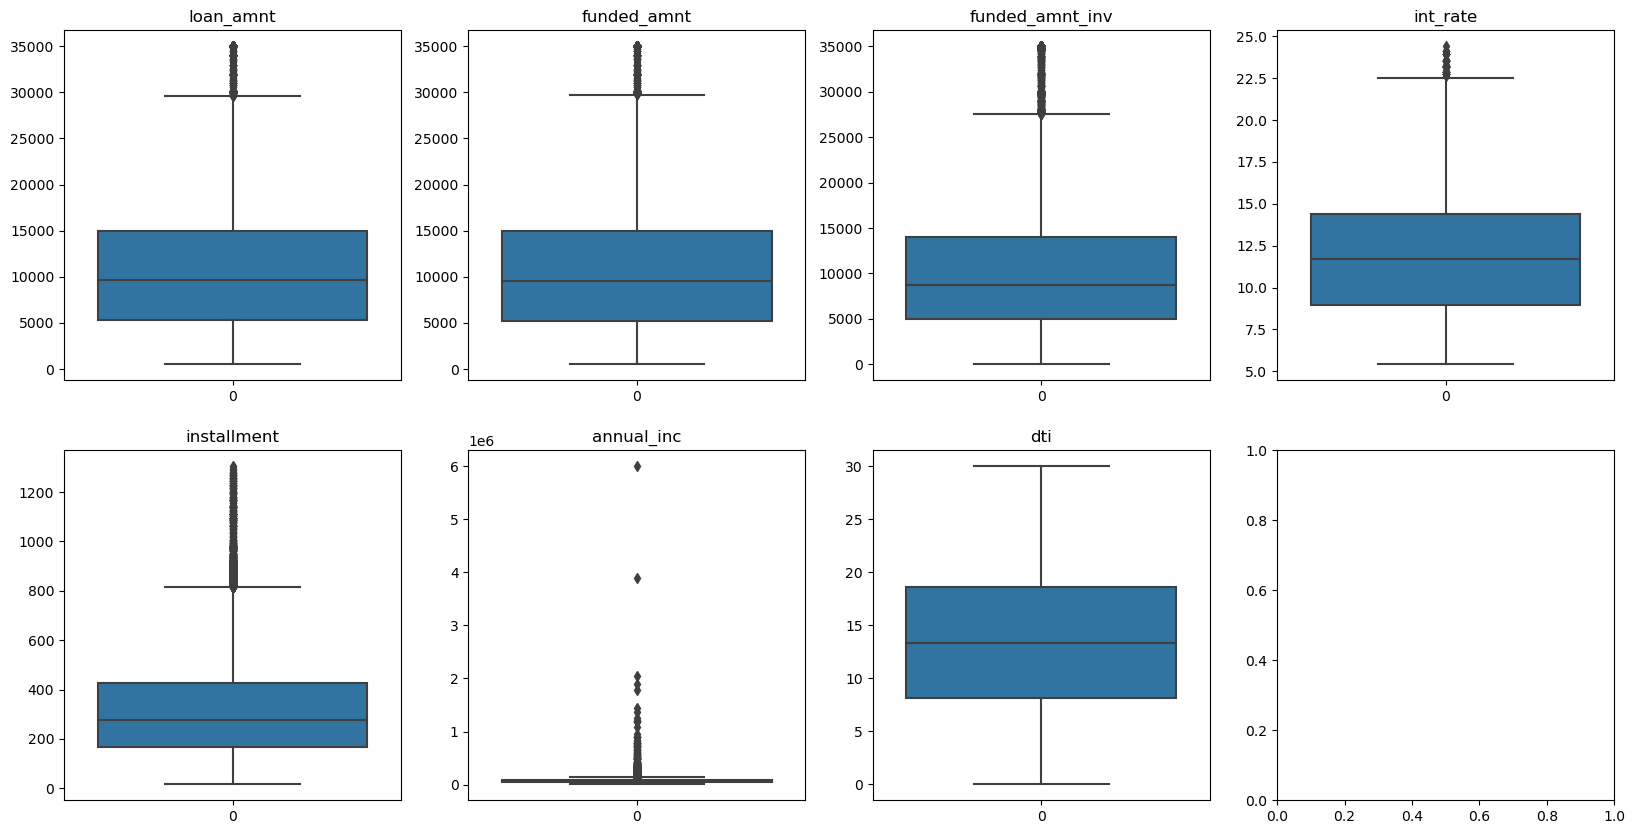

In [113]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Looping through the columns and plotting each continuous variable on a boxplot
for i, j in enumerate(numeric_variables):
    row = i // 4
    col = i % 4
    ax = axes[row][col]    #The ax parameter is used to specify the subplot to plot each column on
    sns.boxplot(loan_df[j], ax=ax)
    ax.set_title(j)

plt.show()

No outliers noted for dti. 
We proceed with treating the outliers for loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc by replacing the values less than the lower threshold by the lower threshold and the values more than the upper threshold by the upper threshold.

In [115]:
# fixing outliers 

def fix_outliers(df, column_name):
    lower_threshold, upper_threshold = outlier_thresholds(df, column_name)
    # values less than lower_threshold is replaced by lower_threshold
    df.loc[(df[column_name] < lower_threshold), column_name] = lower_threshold
    # values more than upper_threshold is replaced by upper_threshold
    df.loc[(df[column_name] > upper_threshold), column_name] = upper_threshold

for col in columns_with_outliers:
    fix_outliers(loan_df, col)

#### Final boxplot visualization post removal of outliers

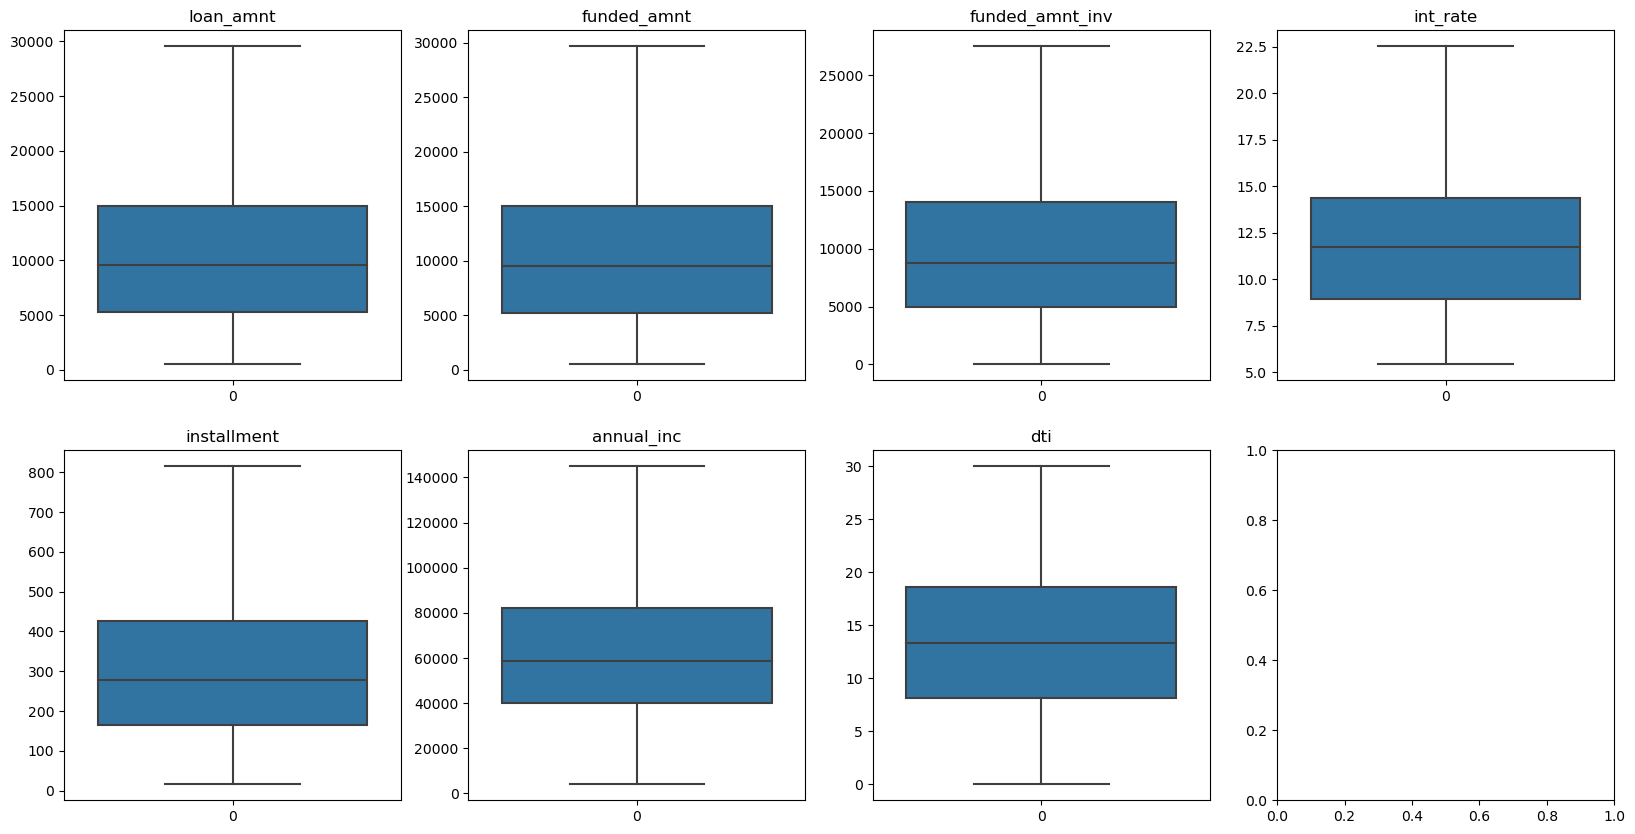

In [116]:
# Setting up the subplots after removing outliers 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Looping through the columns and plotting each continuous variable on a boxplot
for i, j in enumerate(numeric_variables):
    row = i // 4
    col = i % 4
    ax = axes[row][col]    
    sns.boxplot(loan_df[j], ax=ax)
    ax.set_title(j)

plt.show()

Checking dataframe shape after removal of outliers

In [119]:
print ("Dataframe shape after the treatment of outliers remains the same as that before the treatment of outliers:", loan_df.shape)

Dataframe shape after the treatment of outliers remains the same as that before the treatment of outliers: (38577, 17)


## Univariate, Bivariate, and Multivariate Analyses

To explore individual variables and visualize all the variables for univariate analysis simulatenously, we use subplots, utilizing histograms for numeric variables and bar plots for categorical variables. 

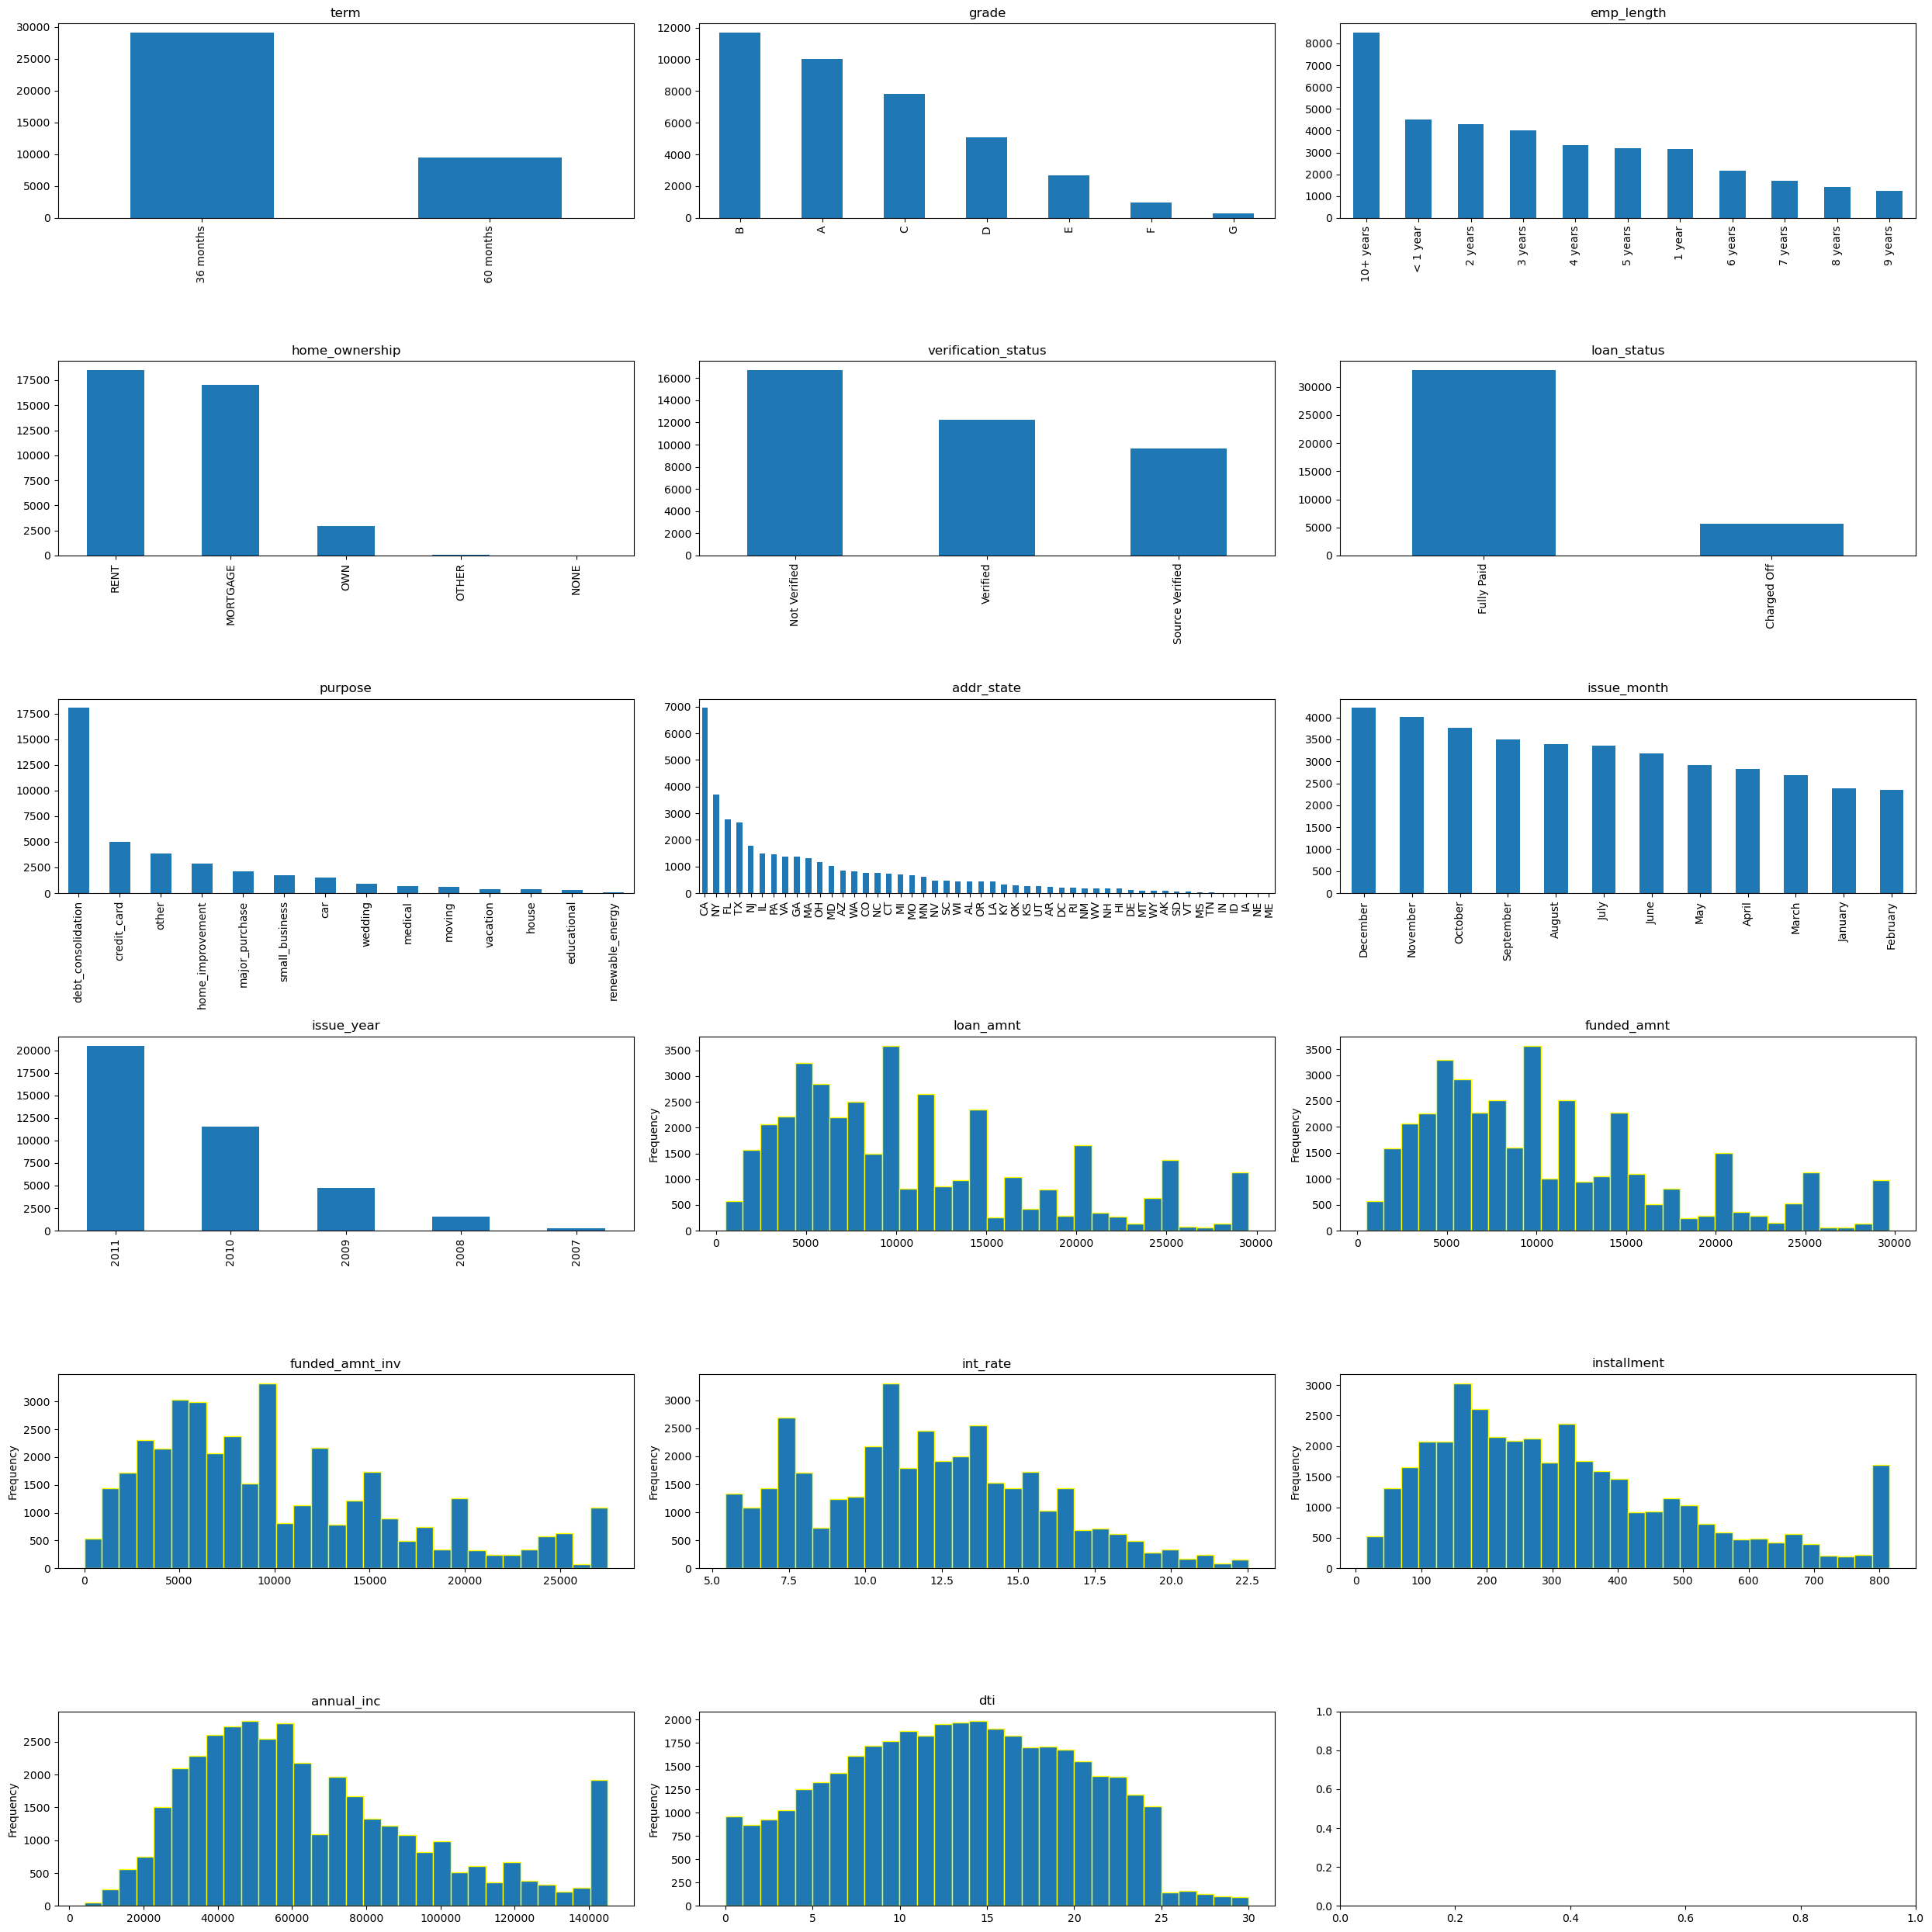

In [124]:
# Univariate Analysis
# setting up a grid of subplots with the desired number of rows and columns
nrows = 6
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))

# looping over all variables and create a histogram or bar plot for each variable
for i, var in enumerate(categorical_variables + numeric_variables):
    row = i // ncols
    col = i % ncols
    if var in categorical_variables:
        loan_df[var].value_counts().plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(var)
    else:
        loan_df[var].plot(kind='hist', ax=axes[row, col], bins=30, edgecolor='yellow')
        axes[row, col].set_title(var)
plt.tight_layout()
plt.show()

While the above plots provide an understanding of the spread, range, and distribution of the individual column variables across the records, it is more meaningful if we visualize the same plots specifically comparing between the defaulters (Charged Off) and non-defaulters (Fully Paid)

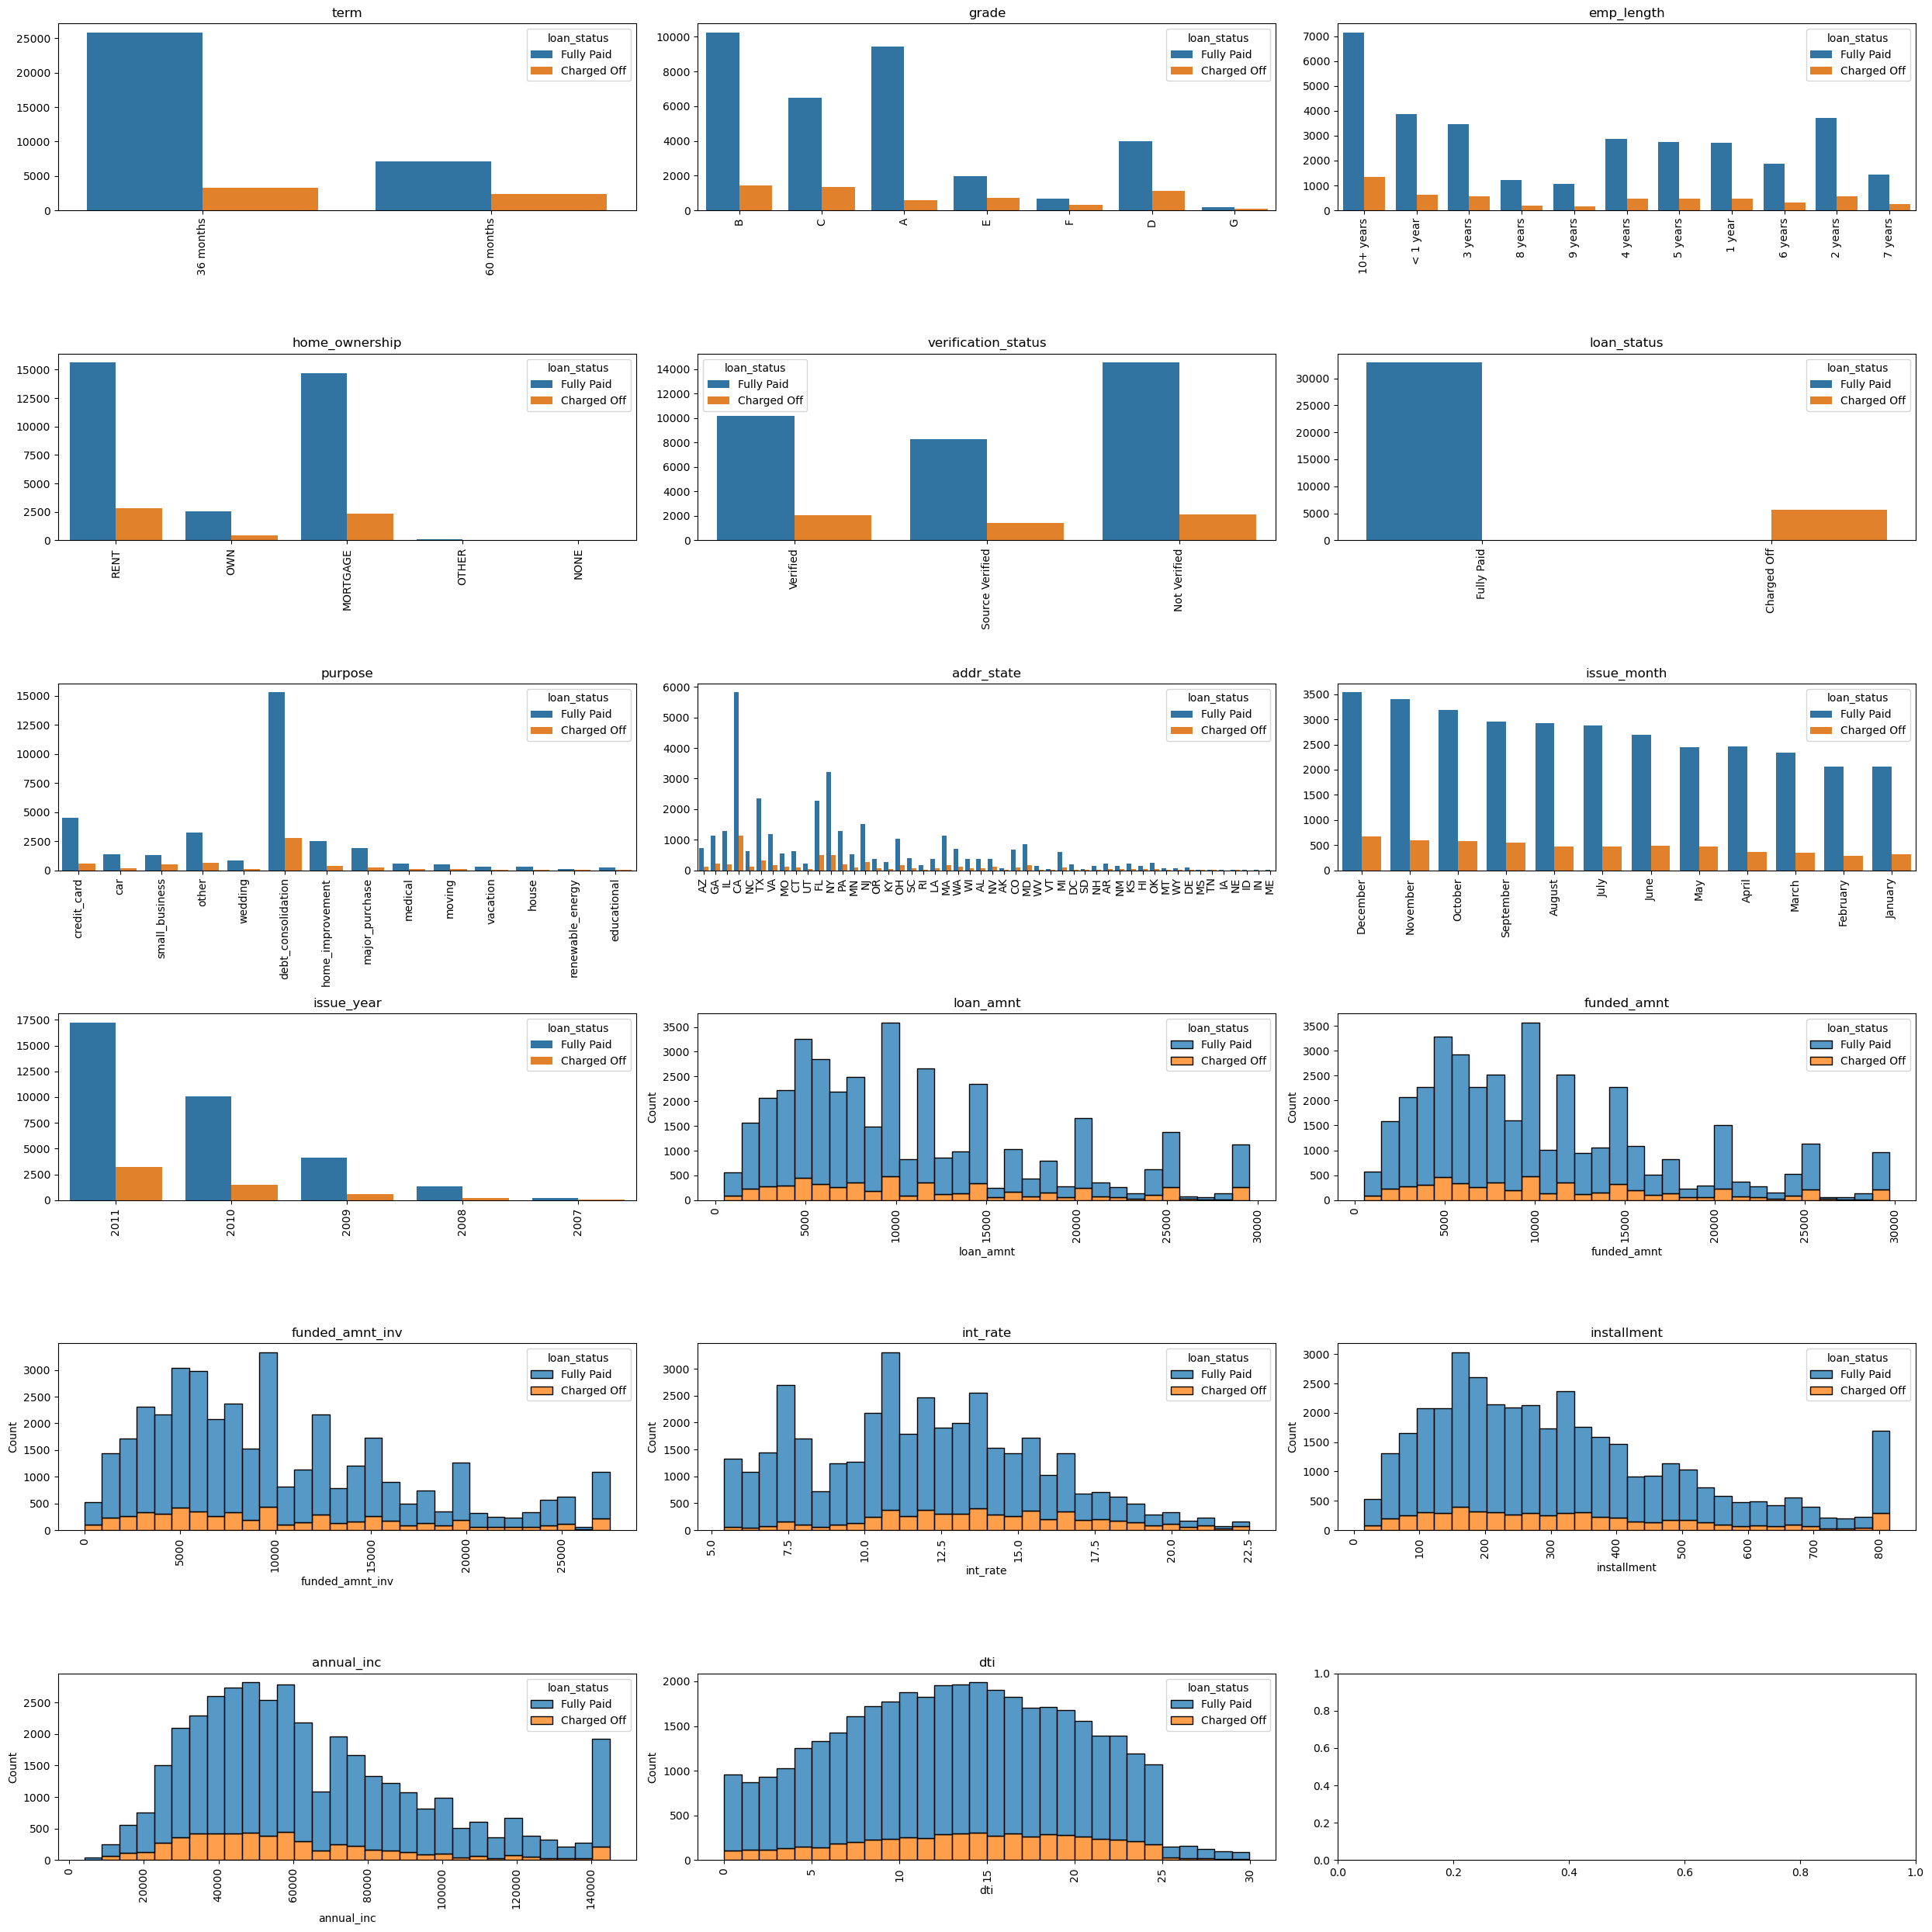

In [125]:
# setting up a grid of subplots with the desired number of rows and columns
nrows = 6
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,25))

# looping over all variables and create a histogram or bar plot for each variable
for i, var in enumerate(categorical_variables + numeric_variables):
    row = i // ncols
    col = i % ncols
    if var in categorical_variables:
        sns.countplot(data=loan_df, x=var, hue='loan_status', ax=axes[row, col])
        axes[row, col].set_title(var)
        axes[row, col].set_xlabel("")
        axes[row, col].set_ylabel("")
        axes[row, col].tick_params(axis='x', labelrotation=90)
        
    else:
        sns.histplot(data=loan_df, x=var, hue='loan_status', multiple='stack', ax=axes[row, col], bins=30)
        axes[row, col].set_title(var)
        axes[row, col].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()


#### The above analysis with respect to the fully paid and charged off loans for each variable reveals the following: 

The number of defaulters appears to be more  <br> 
• for shorter-term loans with a term of 36 months<br> 
• for grades B and C <br> 
• for 10 or more years of employment, which is slightly counter-intuitive <br> 
• for the home ownership status of 'RENT'<br> 
• when the income is not verified by LC <br> 
• when the purpose is debt consolidation <br> 
• for applicants filing with address as State CA, followed by NY and TX <br> 
• towards the last 4 months of the year, peaking in December <br> 
• in the loan issue year of 2011 <br> 
• when the listed amount of the loan applied for by the borrower and the total funded amount committed to that loan at that point in time are around 5000, 10000, 12000, 15000 <br> 
• when the total amount committed by investors for that loan at that point in time is in the range of 2500-12500 approximately <br> 
• when the interest rate is approximately 10-17% <br> 
• when the monthly payment or installment is approximately 50-400 <br> 
• when the annual income is approximately 30000-70000 <br> 
• dti is below 25 (dti is the ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income) <br> 

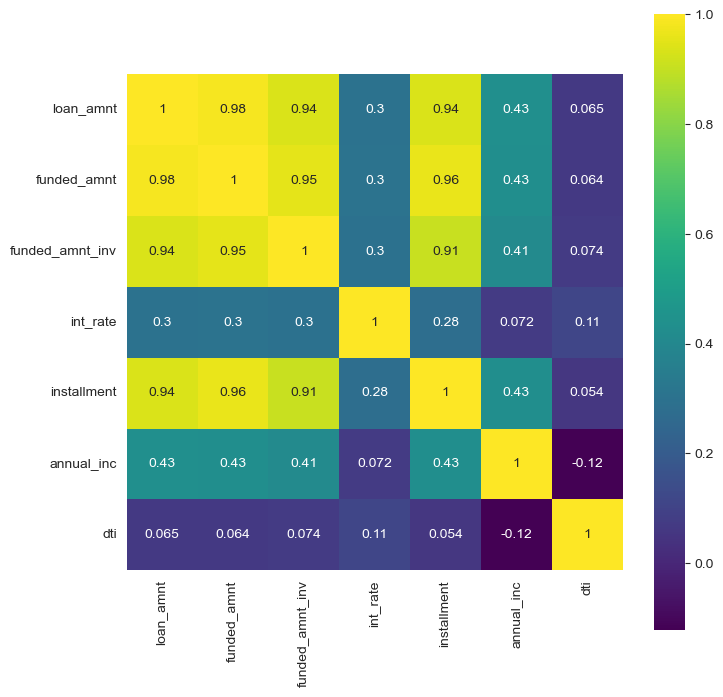

The top 10 pairs of variables with the largest absolute correlations: 
 funded_amnt      loan_amnt          0.982832
                 installment        0.961555
                 funded_amnt_inv    0.953377
installment      loan_amnt          0.937448
funded_amnt_inv  loan_amnt          0.936486
                 installment        0.905209
annual_inc       loan_amnt          0.432883
                 installment        0.428981
                 funded_amnt        0.428814
                 funded_amnt_inv    0.408463
dtype: float64


In [127]:
# Considering only the numerical columns for correlation analysis

selected_columns_num = numeric_variables
loan_df_selected_num = loan_df[selected_columns_num].copy()


# creating a correlation matrix for the numeric columns
corr_matrix_num = loan_df_selected_num.corr()


# create the heatmap
sns.set_style(style="darkgrid")
plt.figure(figsize=(8,8))

sns.heatmap(corr_matrix_num, cmap='viridis', linecolor='white', annot = True, square=True)
plt.show()


# the absolute correlation matrix
corr_abs_num = corr_matrix_num.abs()

# creating a multi-level index of all possible pairs of variables and their correlations
corr_pairs_num = corr_abs_num.unstack().sort_values(ascending=False)

# excluding pairs with identical variables
corr_pairs_num = corr_pairs_num[(corr_pairs_num != 1) & (corr_pairs_num.index.get_level_values(0) != corr_pairs_num.index.get_level_values(1))]

# removing duplicates by keeping only pairs with variables in lexicographical order
corr_pairs_num = corr_pairs_num[corr_pairs_num.index.to_series().apply(lambda x: x[0] < x[1])]

# printing the top 10 pairs of variables with the largest absolute correlations
print("The top 10 pairs of variables with the largest absolute correlations: \n", corr_pairs_num.nlargest(10))

Based on the correlation coefficients, it seems that the three variables "funded_amnt", "loan_amnt", and "funded_amnt_inv" are highly correlated with each other. The next highly correlated pair is "installment" and "loan_amnt", followed by "funded_amnt_inv" and "installment".

To understand the inter-relations between the catagorical variables, bar charts are used as shown below.

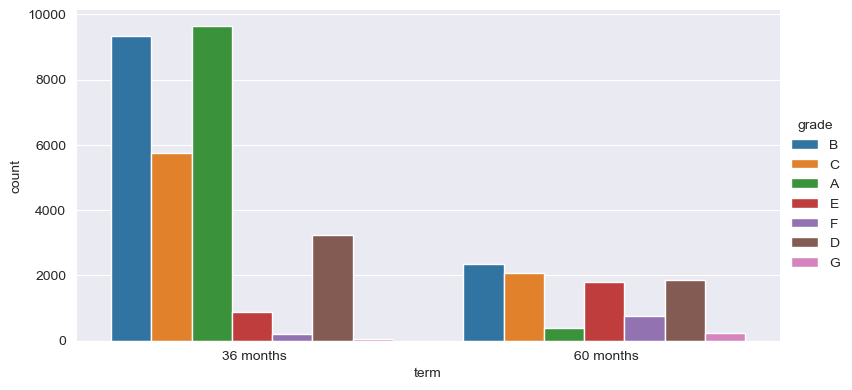

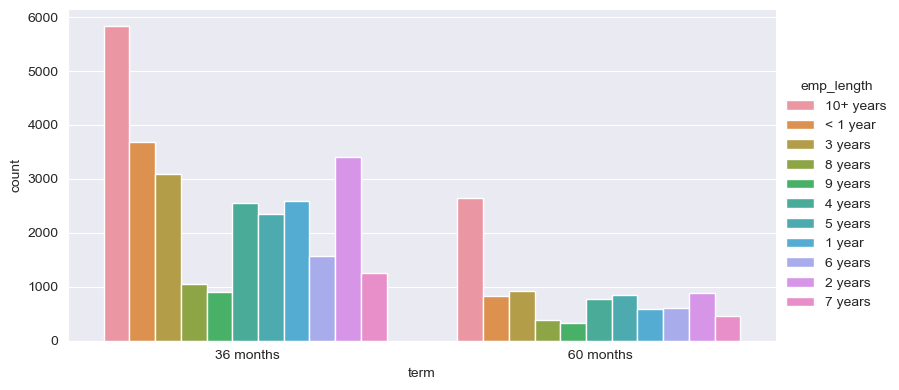

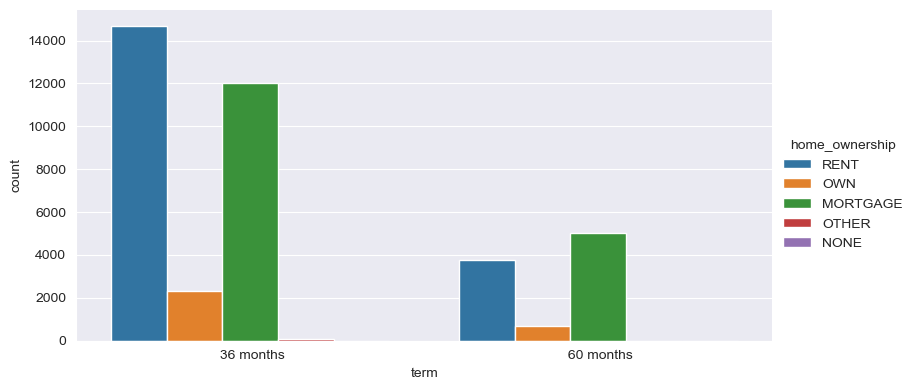

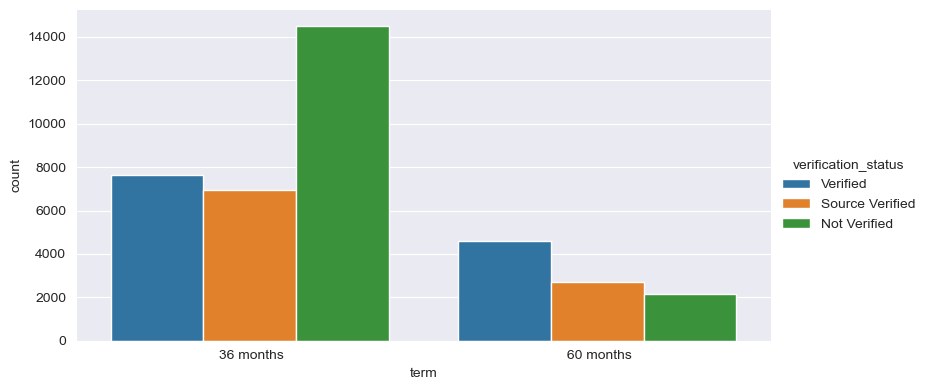

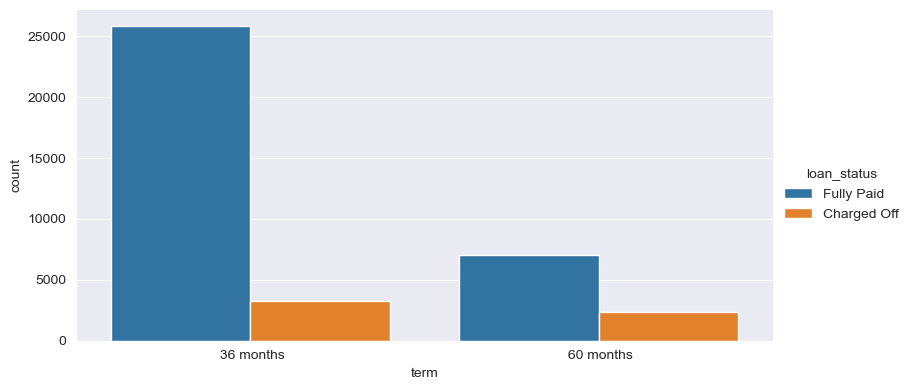

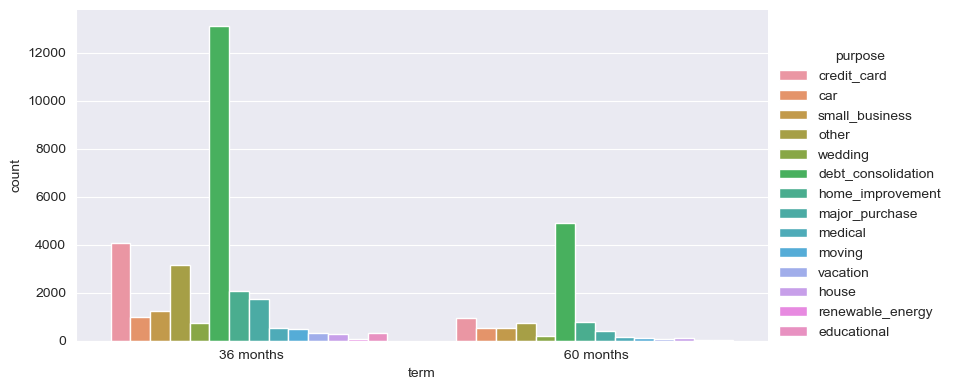

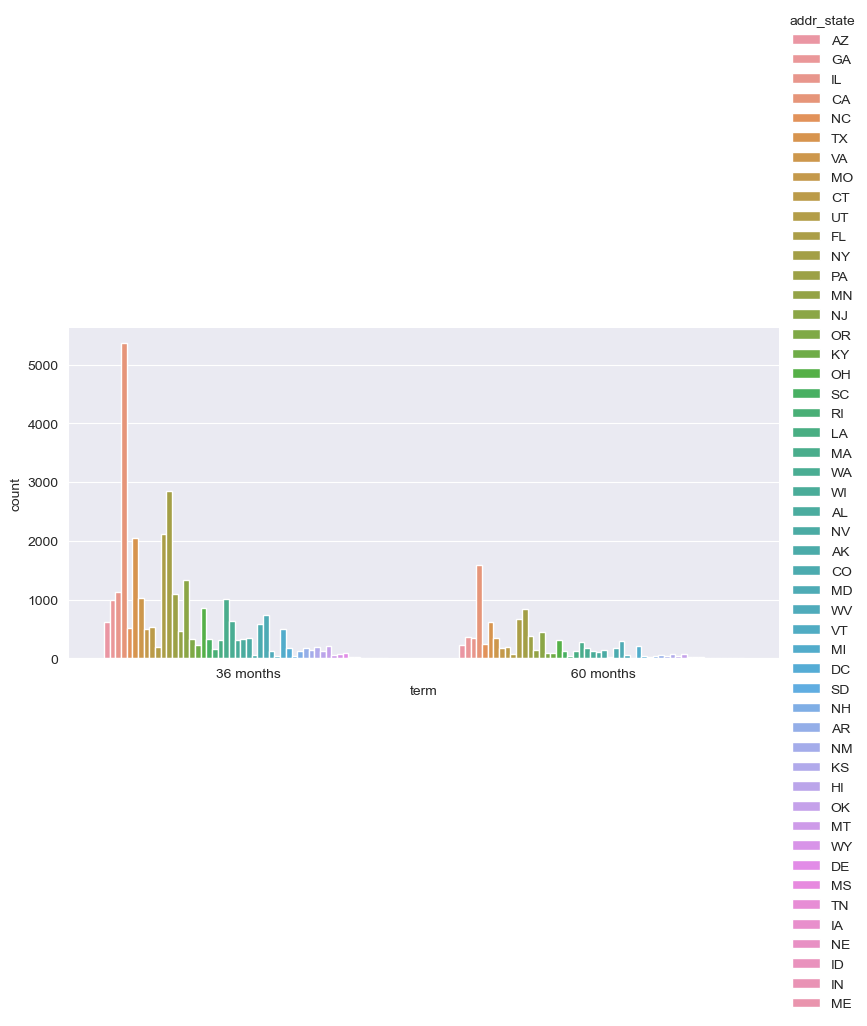

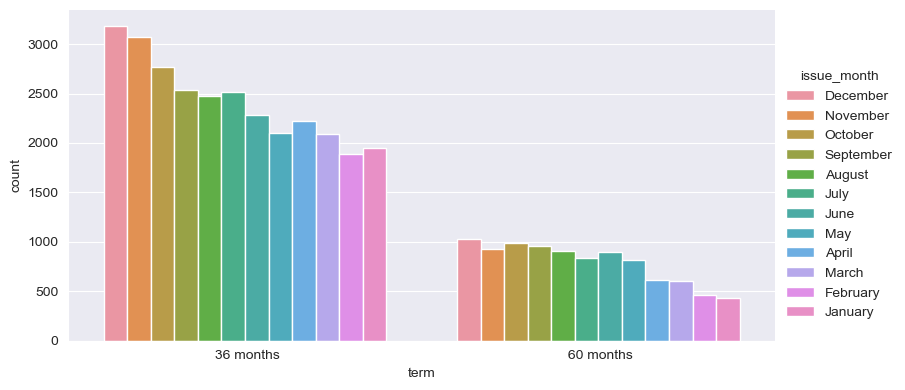

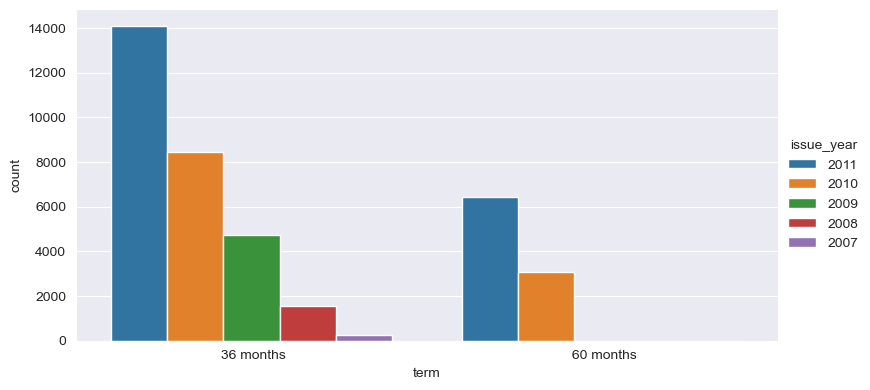

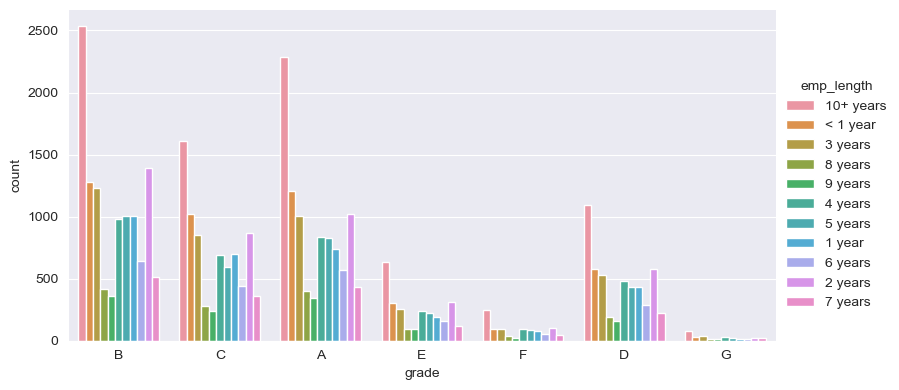

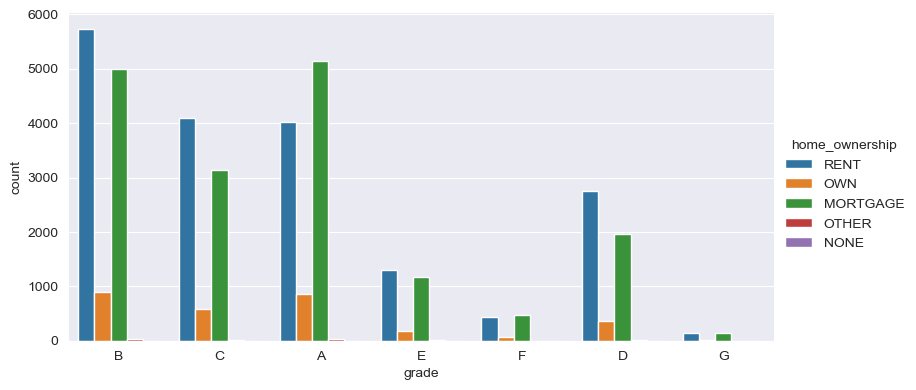

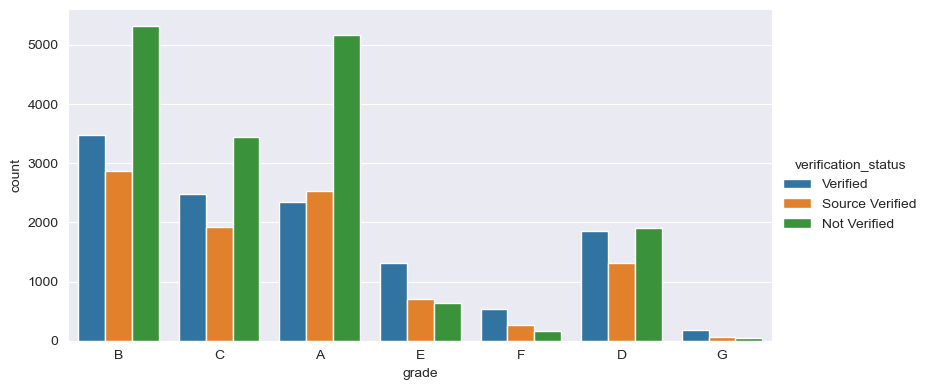

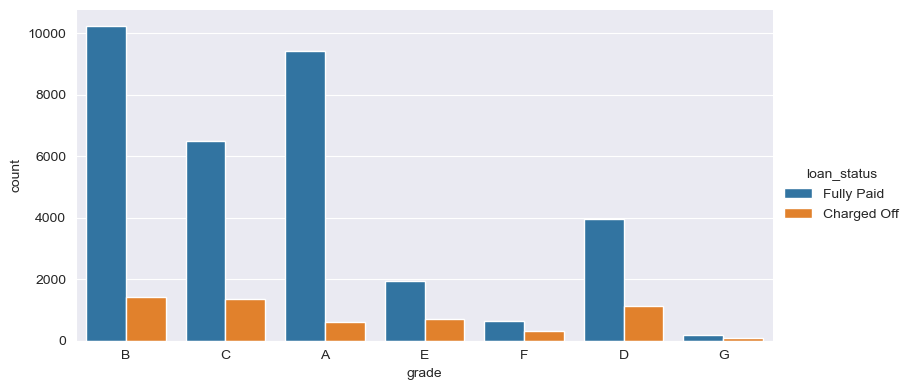

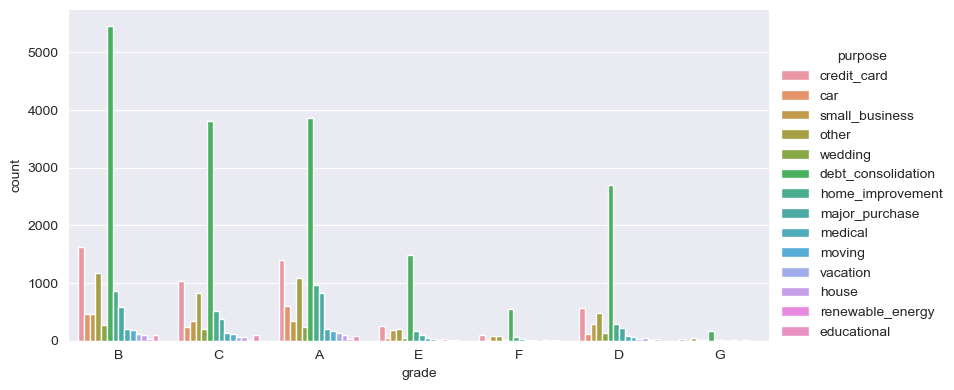

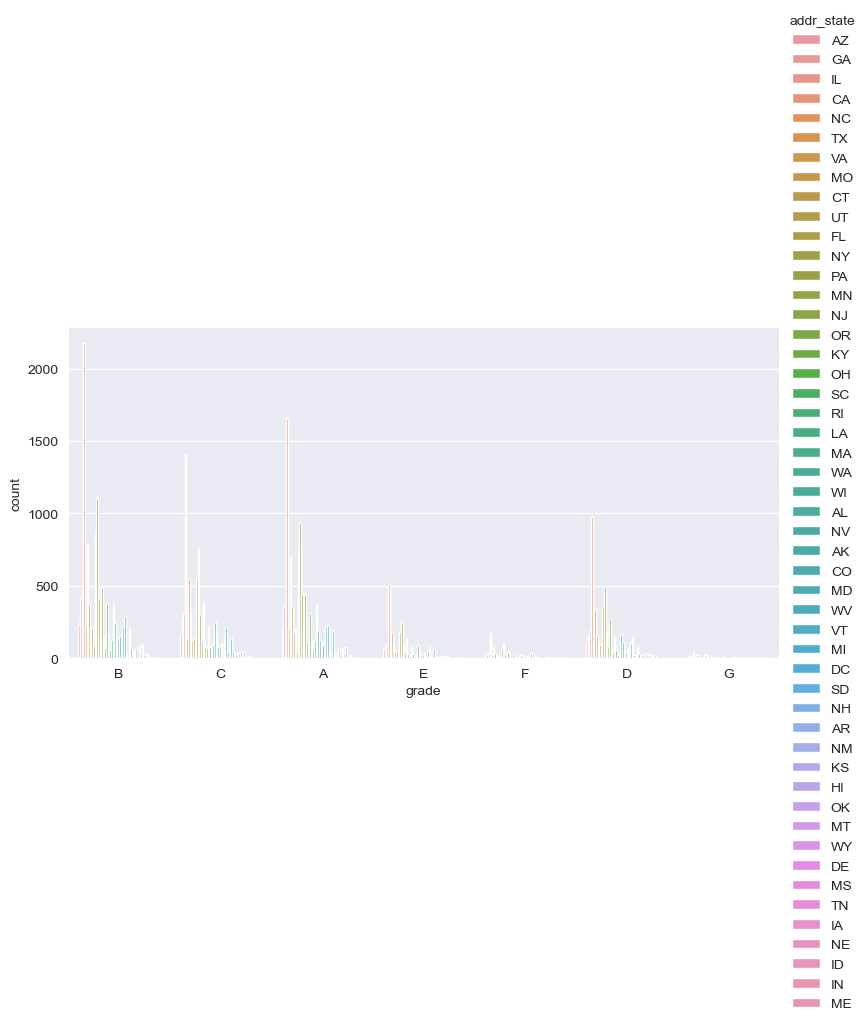

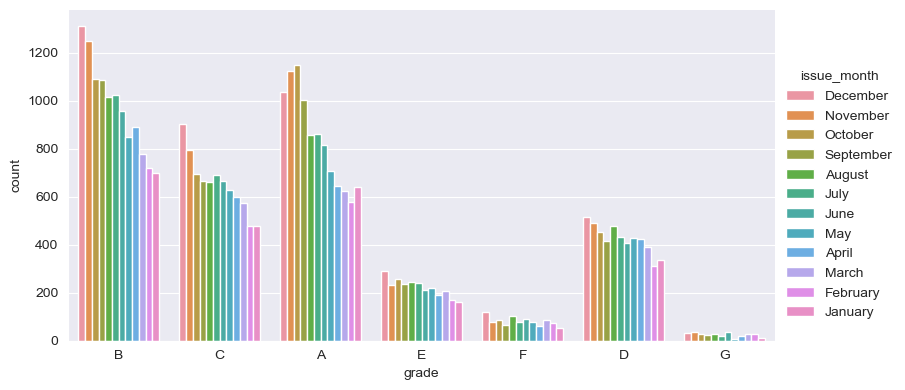

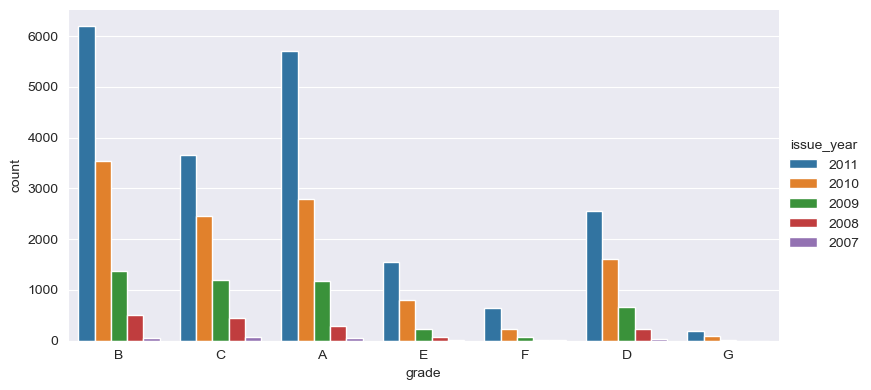

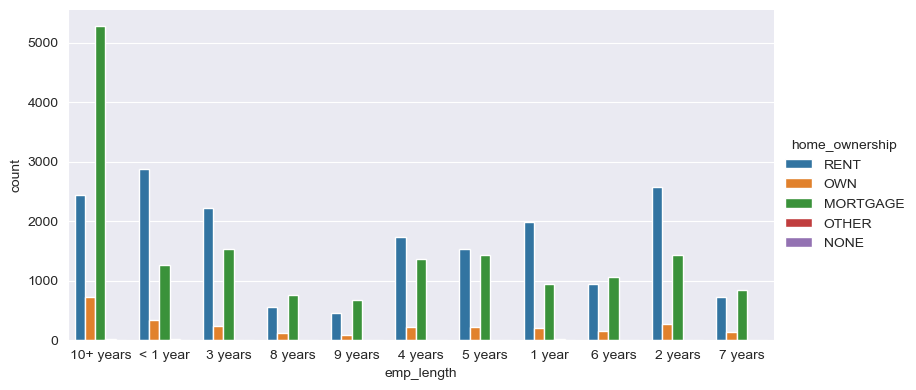

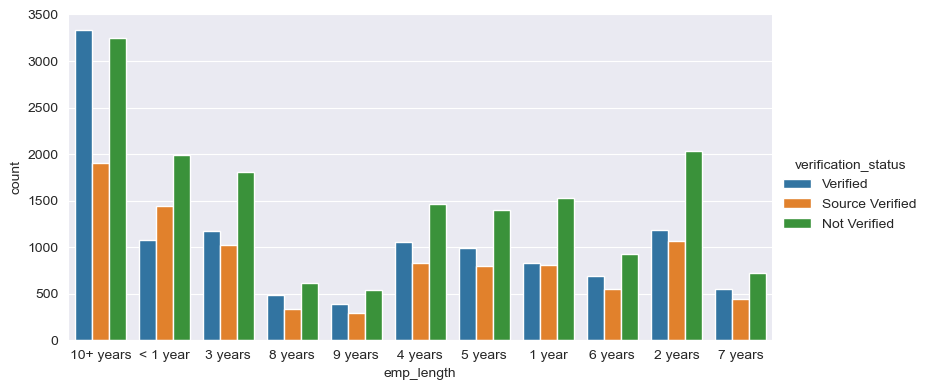

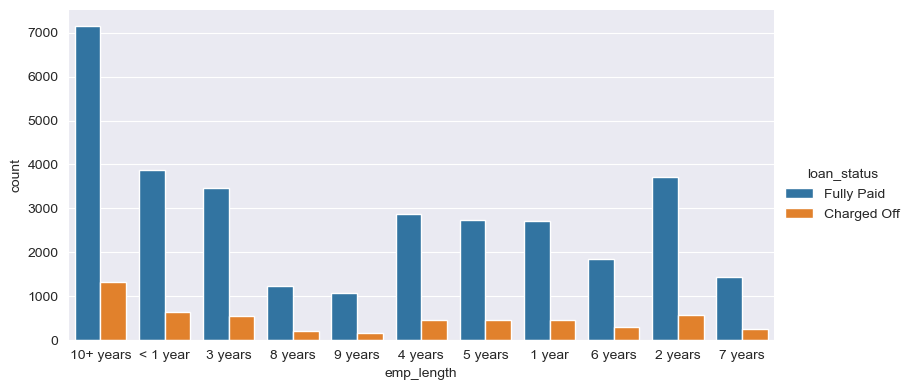

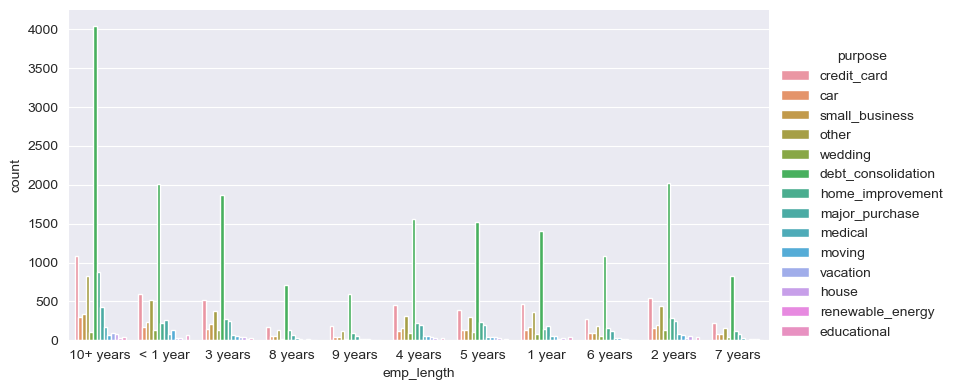

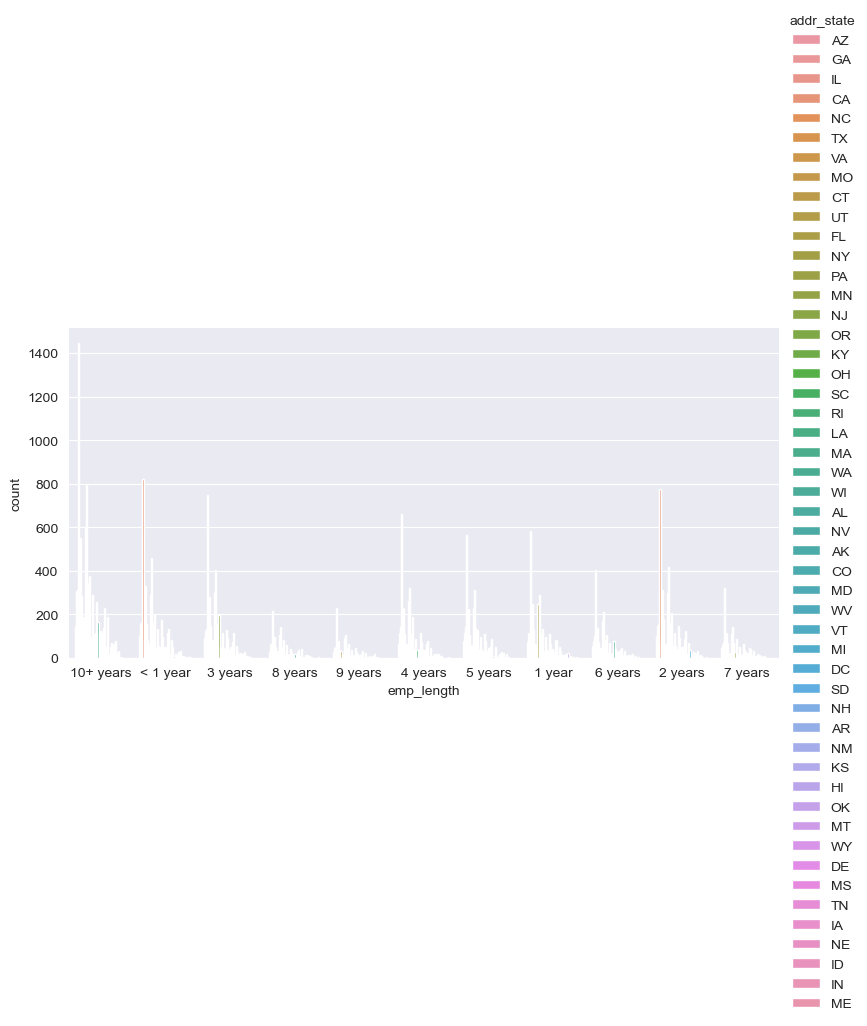

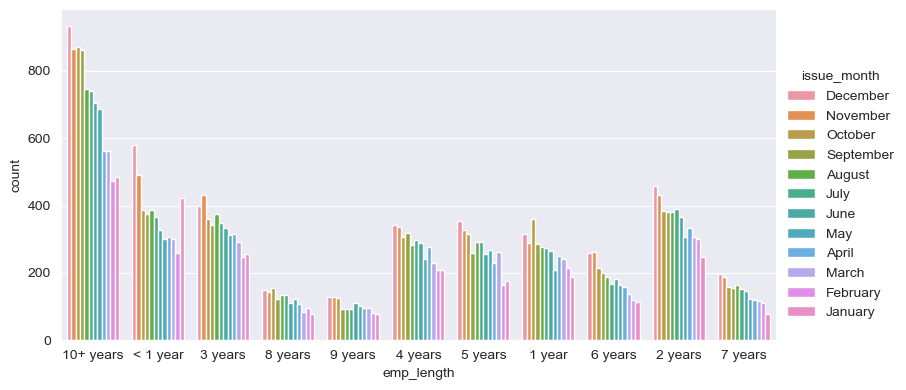

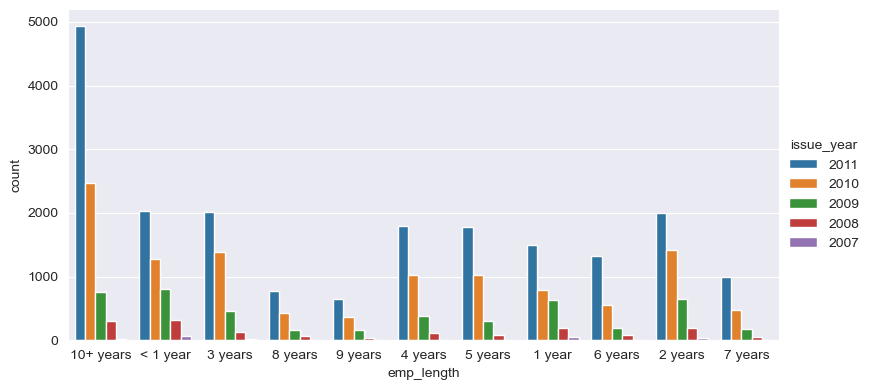

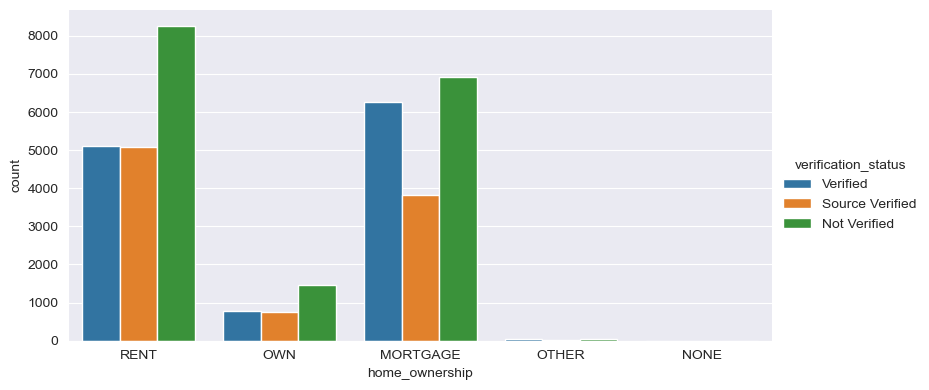

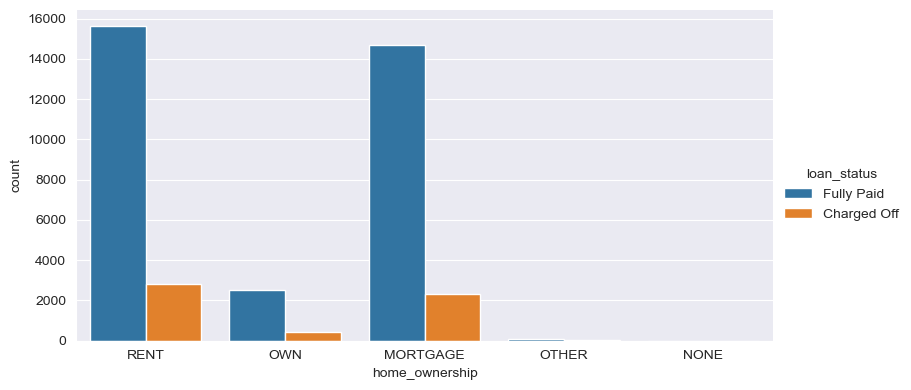

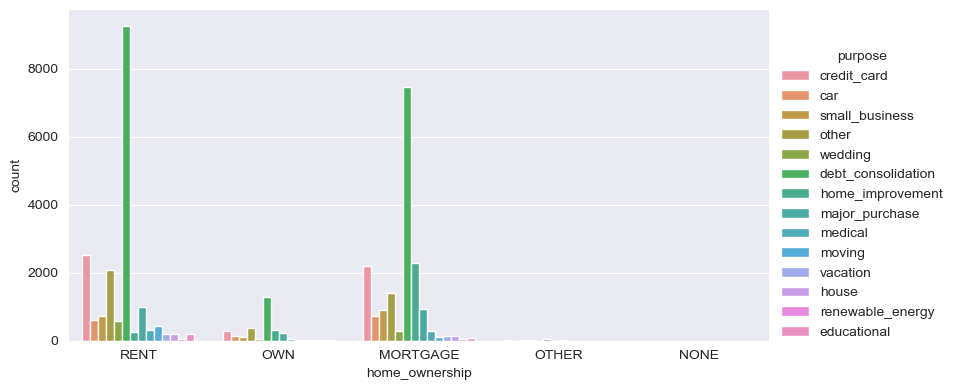

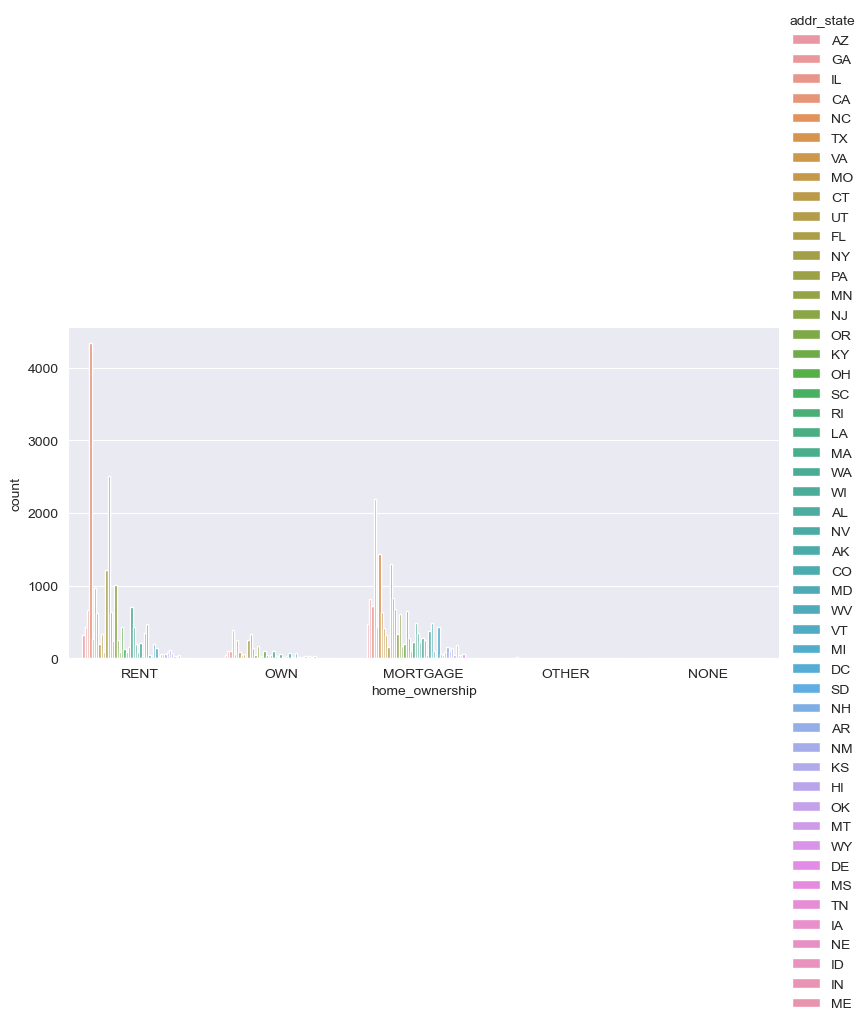

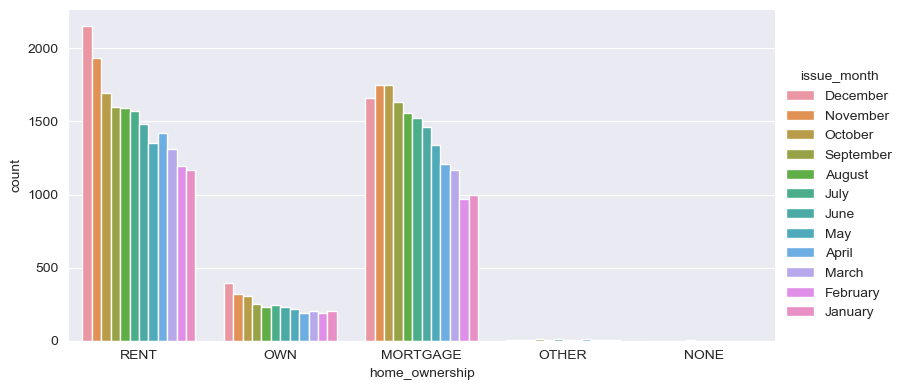

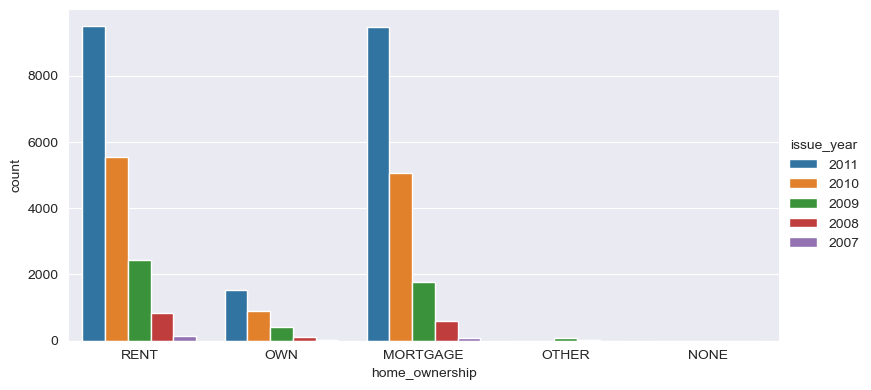

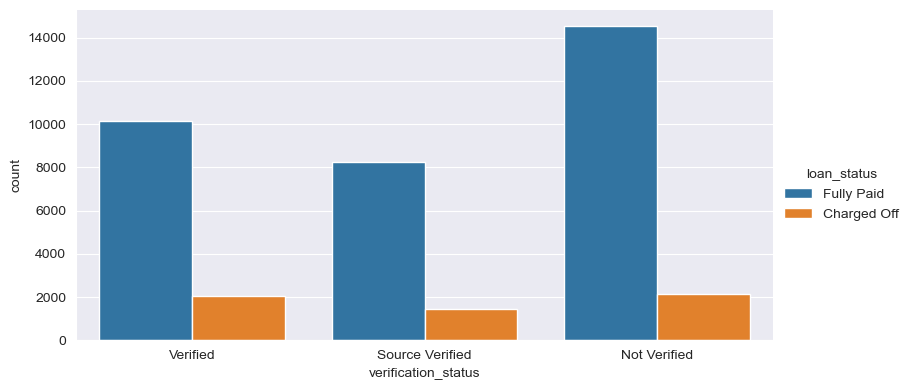

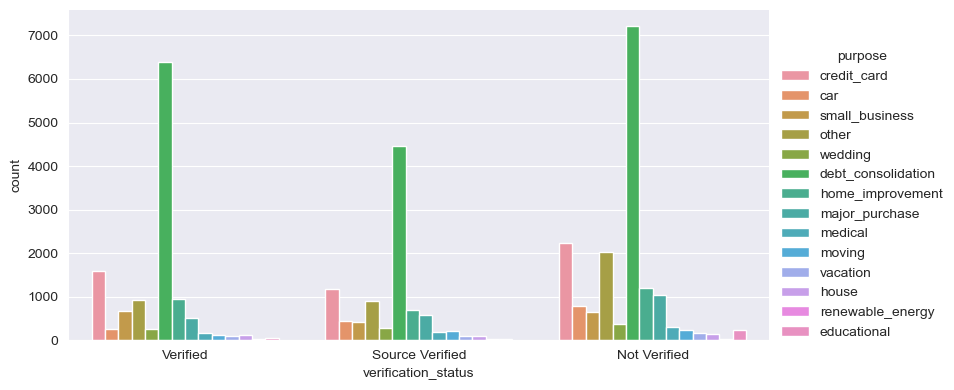

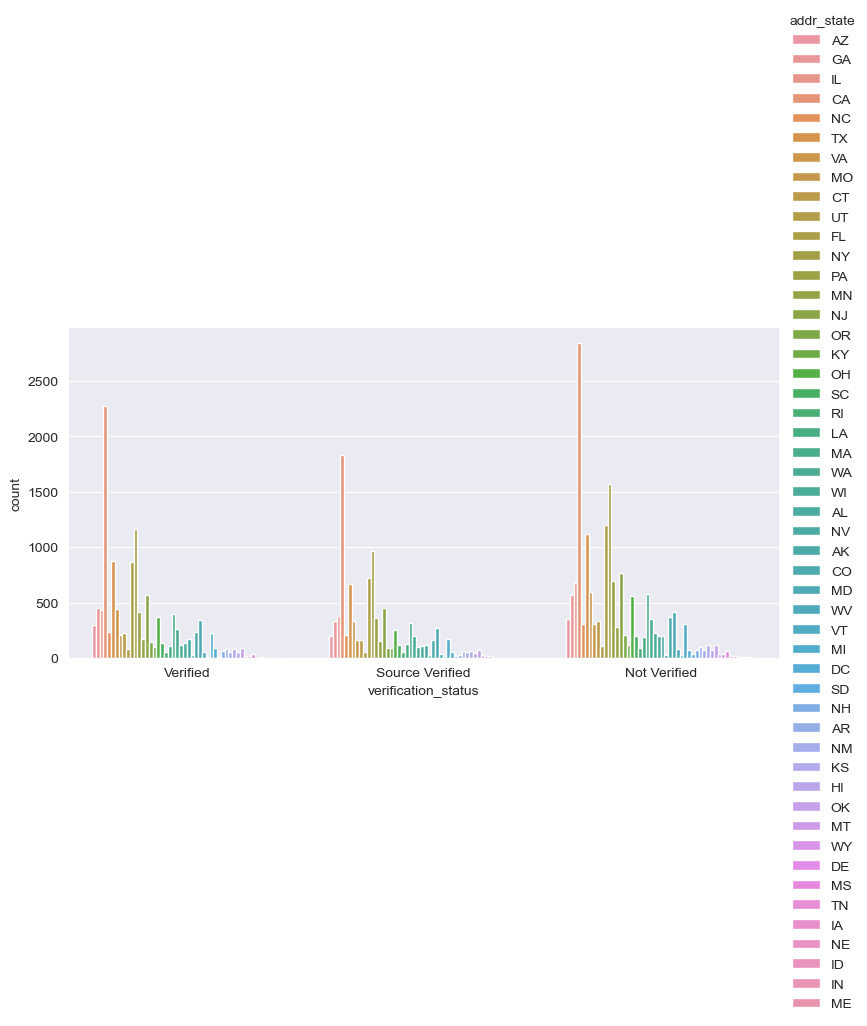

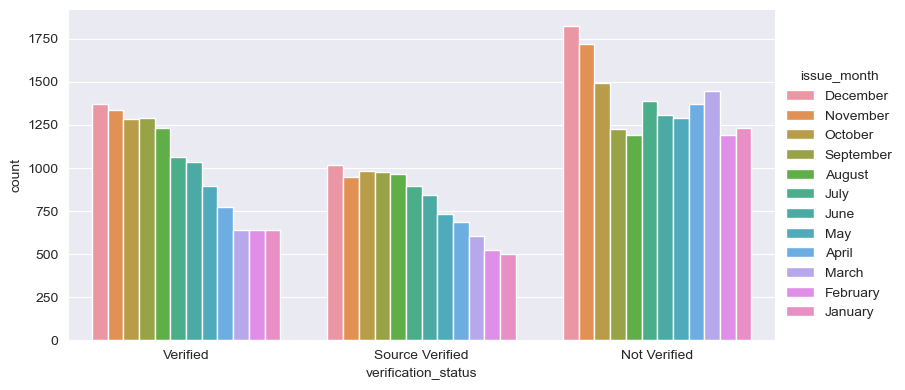

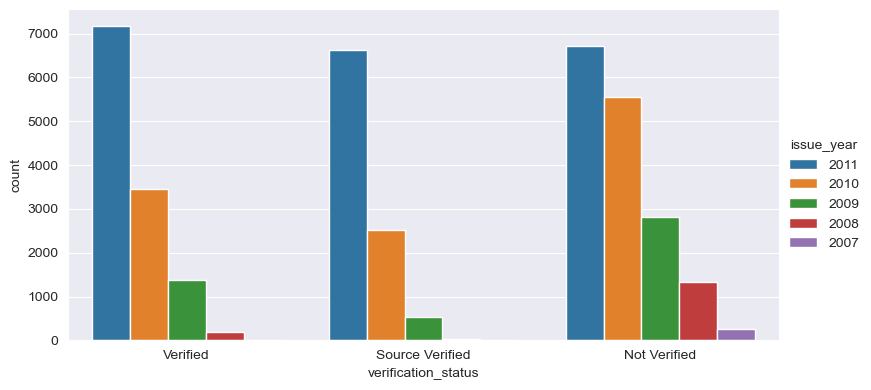

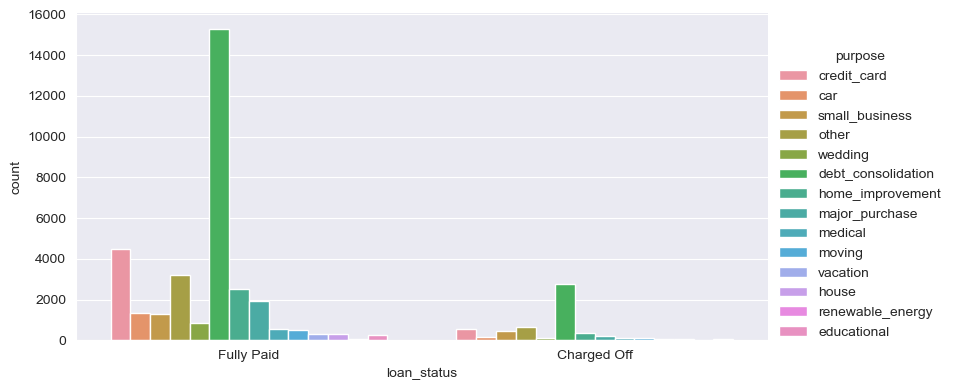

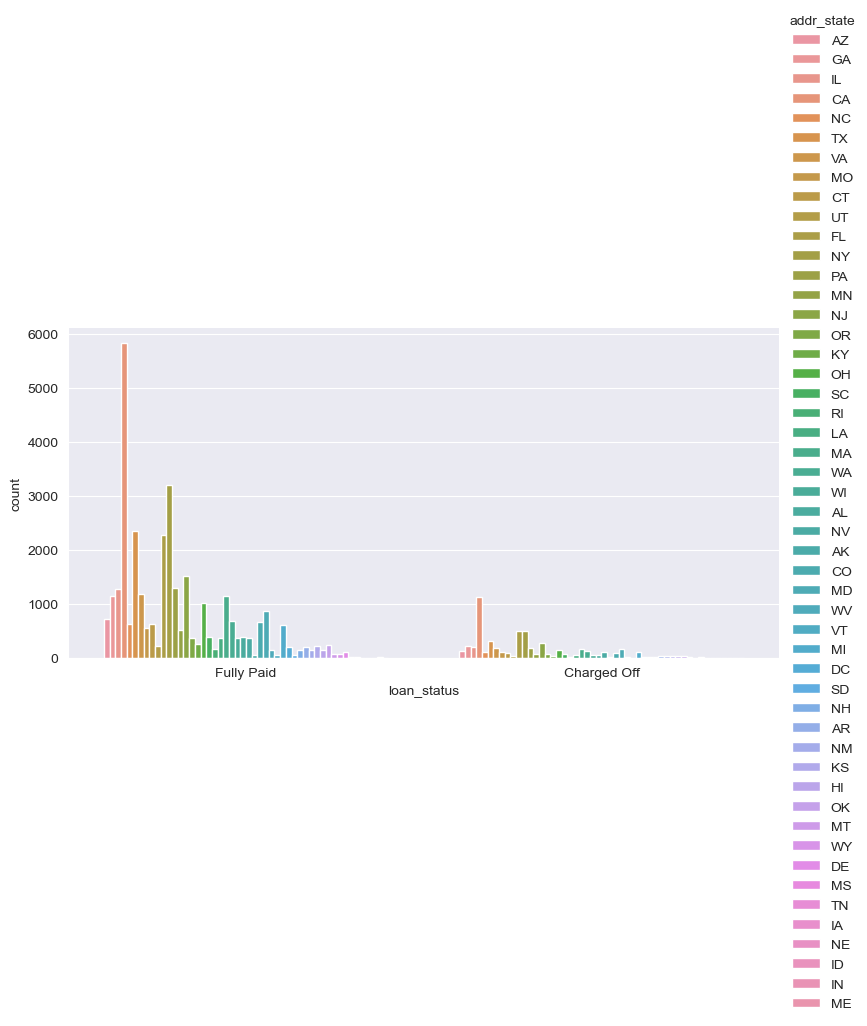

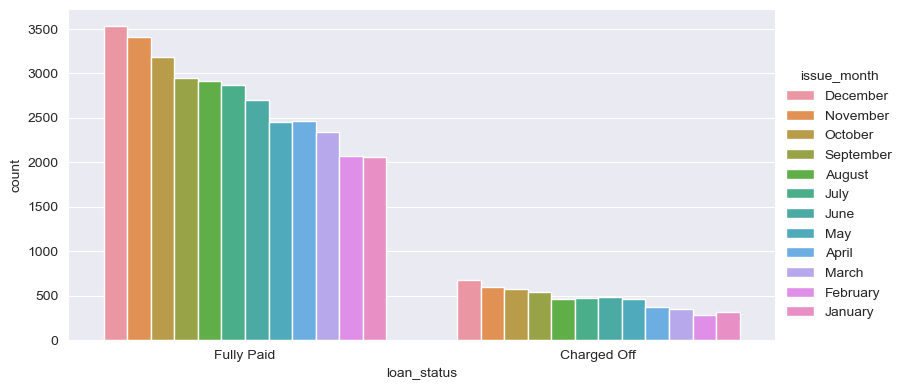

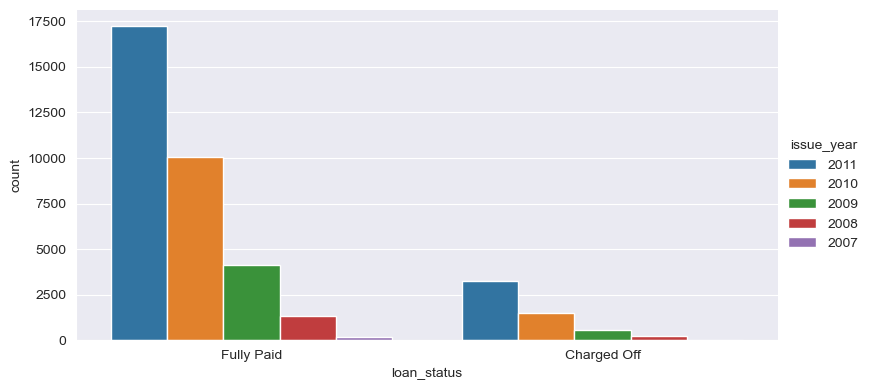

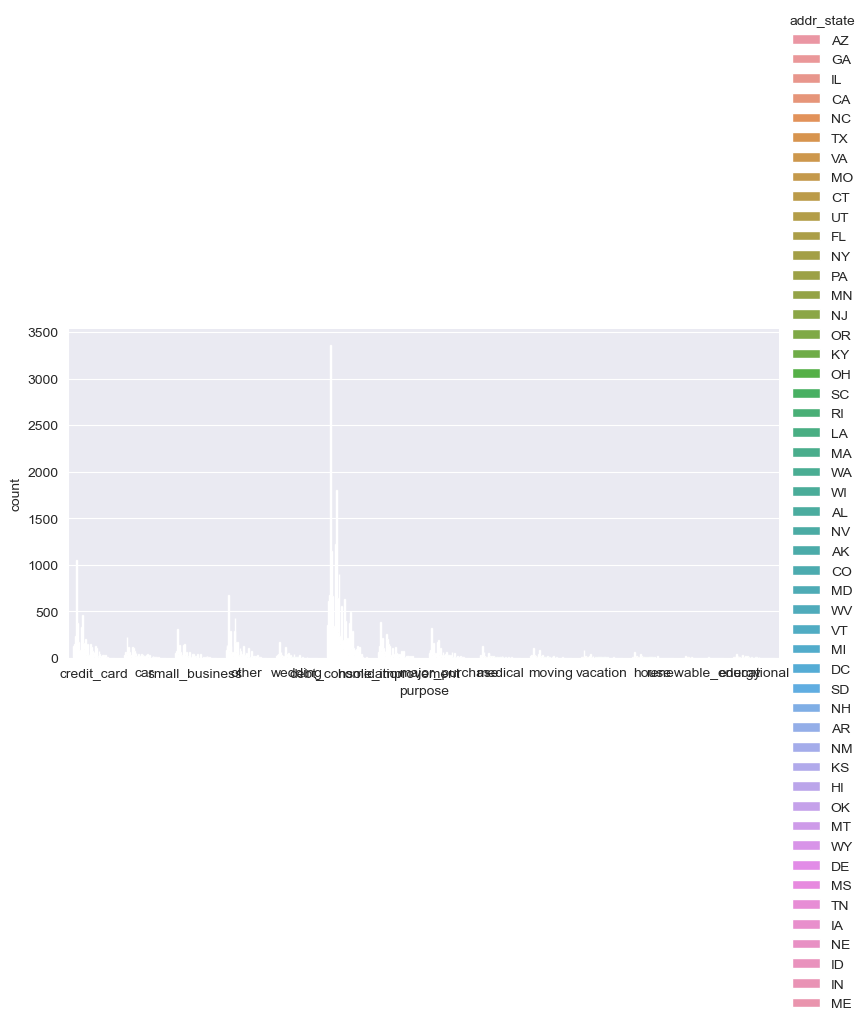

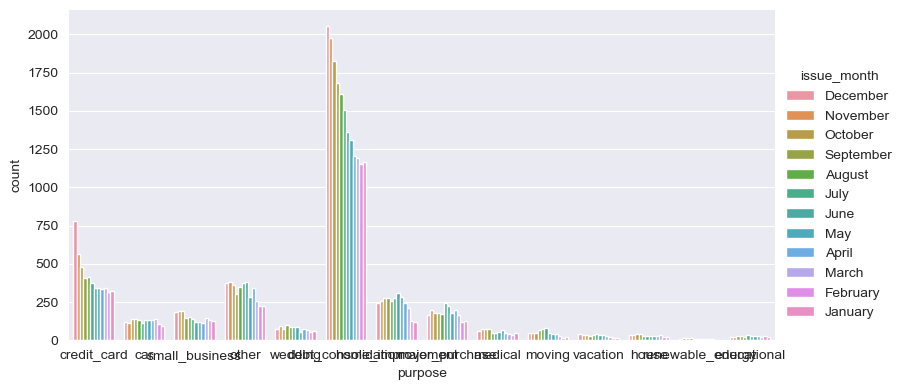

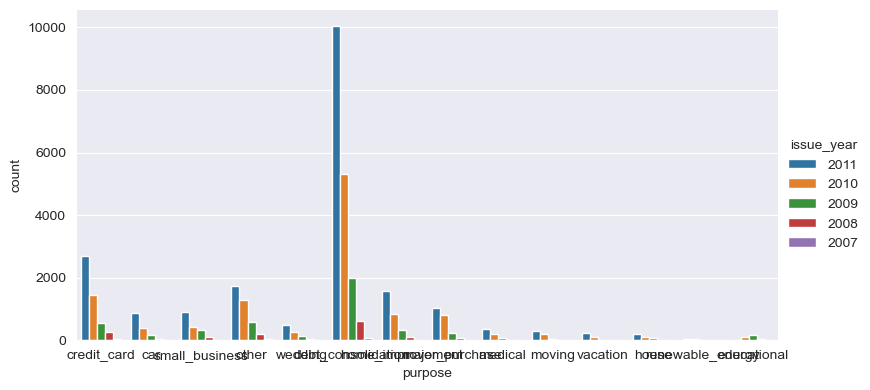

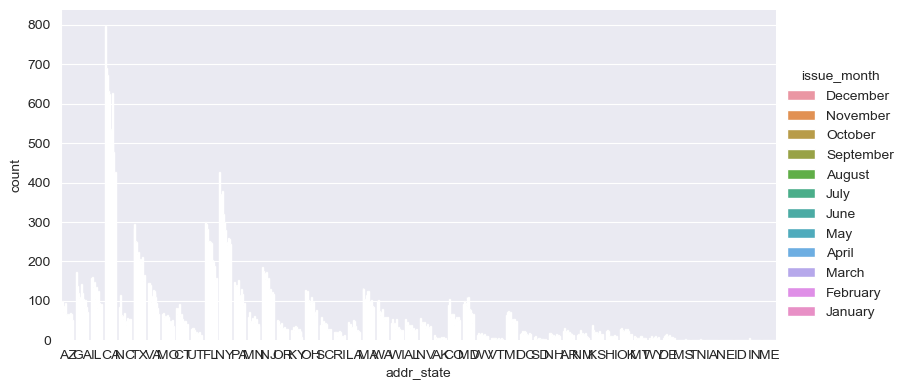

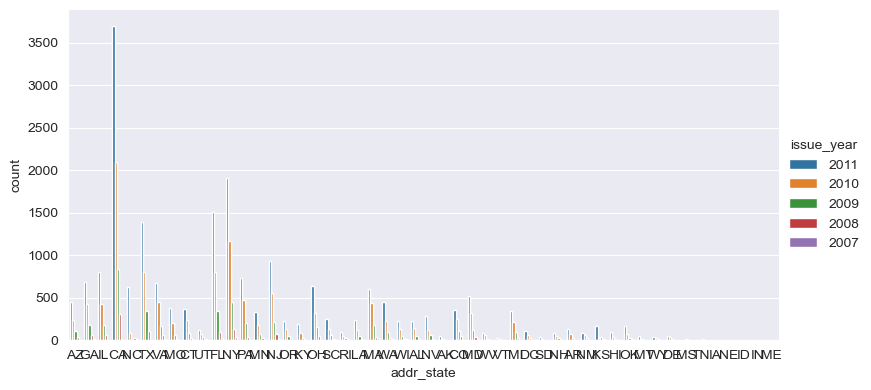

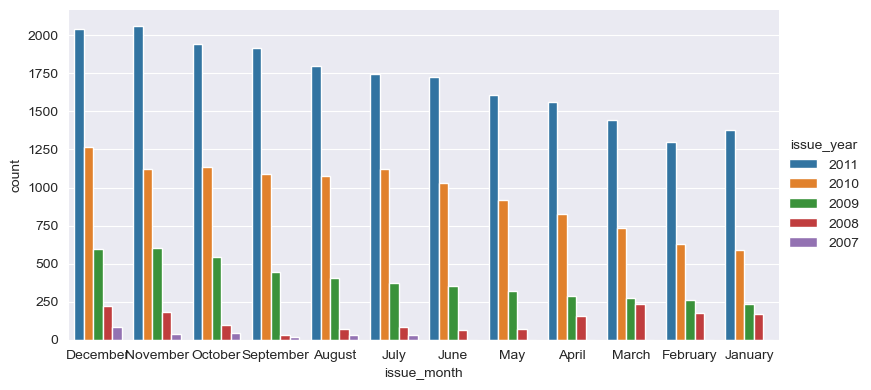

In [129]:
# iterating over all pairs of categorical variables and visualizing the relationship using bar charts
for i in range(len(categorical_variables)):
    for j in range(i+1, len(categorical_variables)):
        x_var = categorical_variables[i]
        y_var = categorical_variables[j]
        sns.catplot(x=x_var, hue=y_var, data=loan_df, kind="count", height=4, aspect=2)
        plt.show()

From the bar charts, the following inferences are drawn:

Most loans are for a term of 36 months.<br>
Loans are mostly given to borrowers with grade A, B, or C.<br>
The largest number of borrowers have been employed for 10+ years.<br>
Majority of the borrowers are living in rented places or in their own dwellings.<br>
There is substantial difference in the status of verification for loans drawn over a term of 36 months, compared with those drawn over 60 months. <br>
Most loans are fully paid.<br>
Debt consolidation is the most common purpose for taking a loan.<br>
CA, NY, and TX are the states with the highest number of loan applicants.<br>
The highest number of loans are issued in the last three months of the year.<br>
Most loans were issued in the years 2011 and 2010 in the current dataset used in this study. <br>

Overall, these inferences only reinforce the findings already drawn above (in particular, the inferences from univariate analysis).  

Box plots are used to further visualize the relationships between pairs of categorical and numeric variables

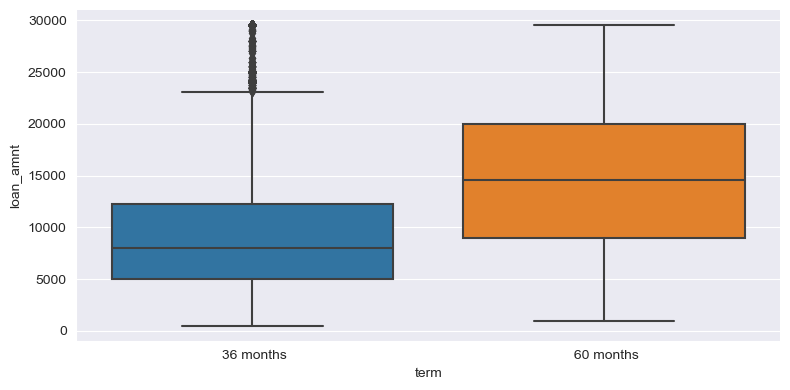

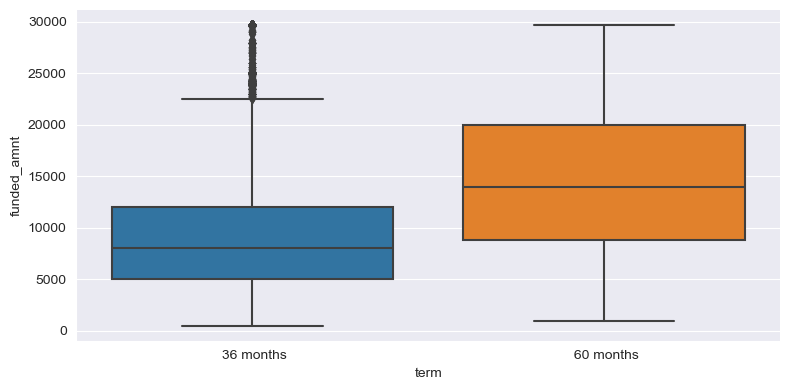

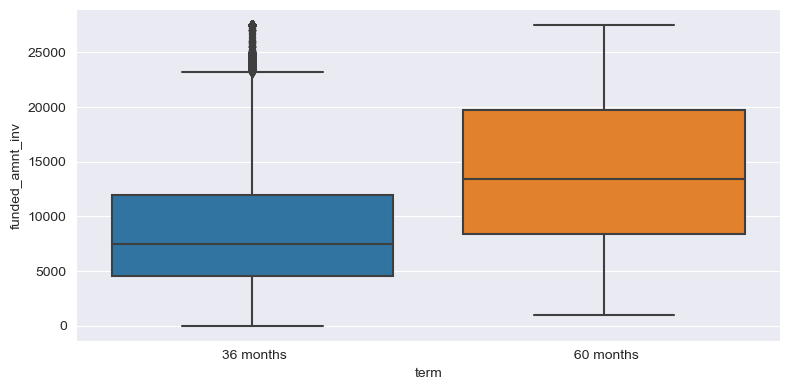

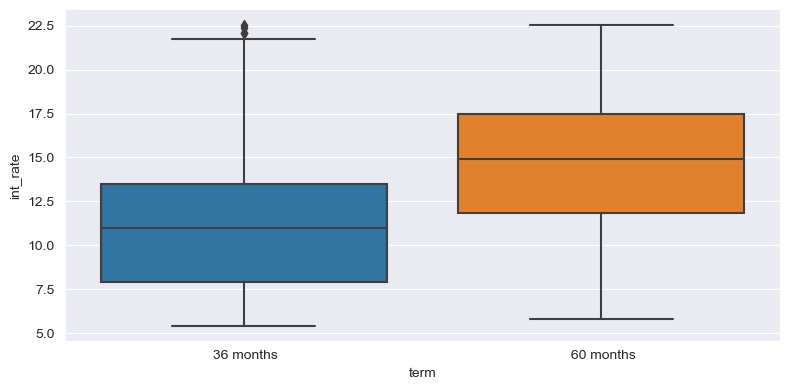

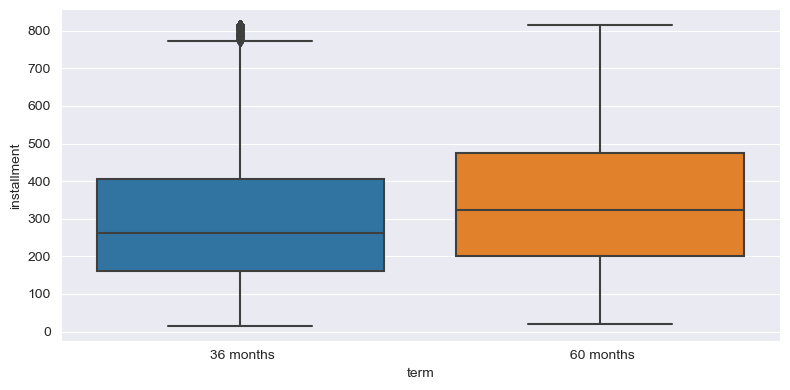

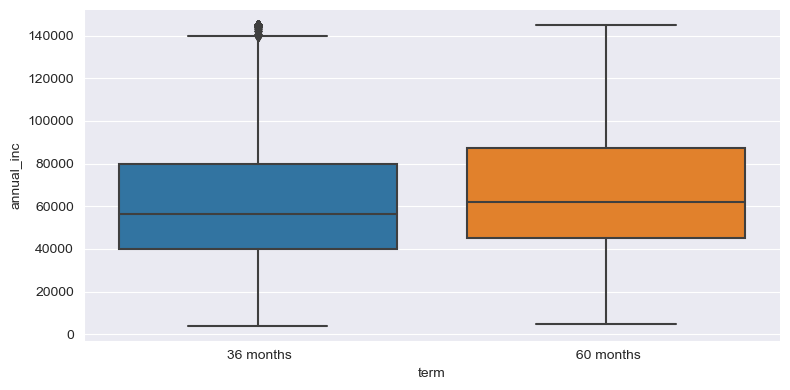

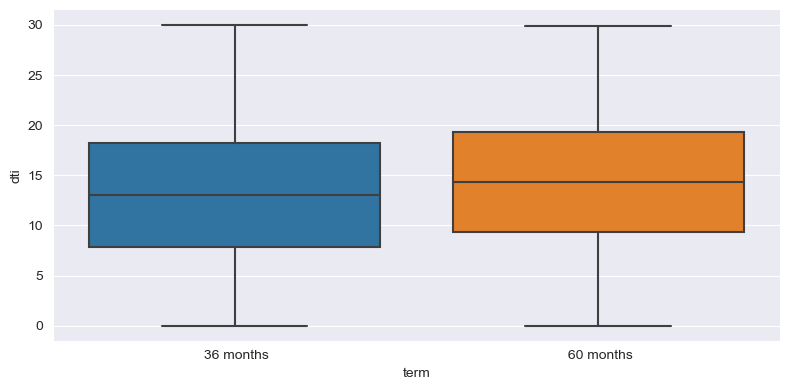

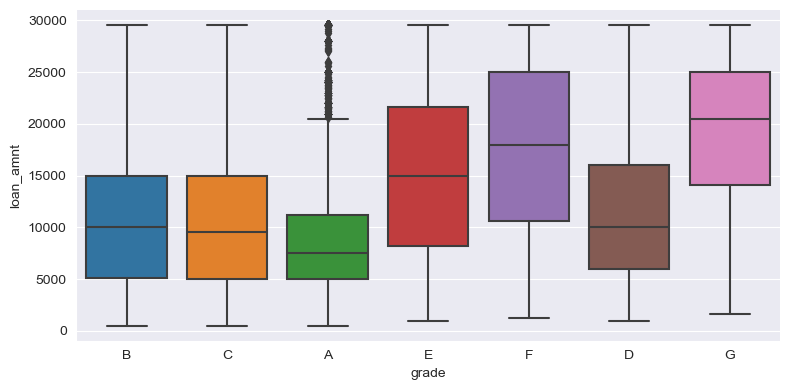

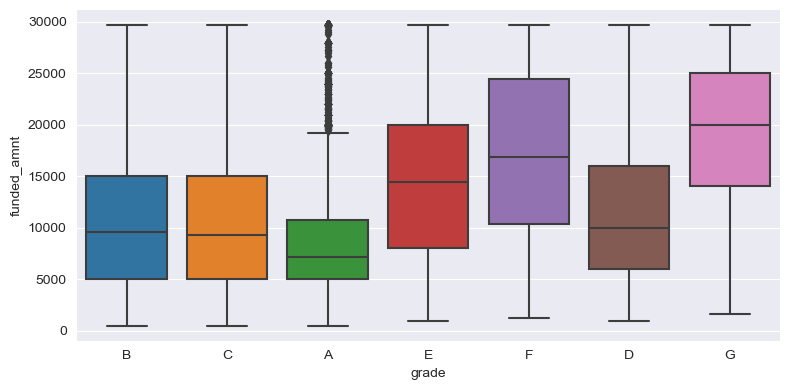

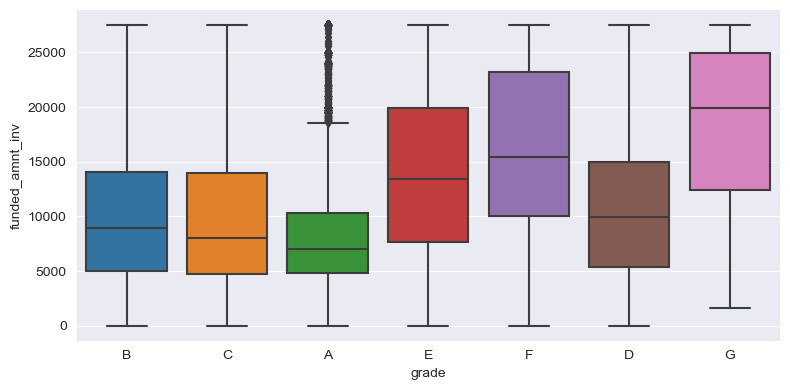

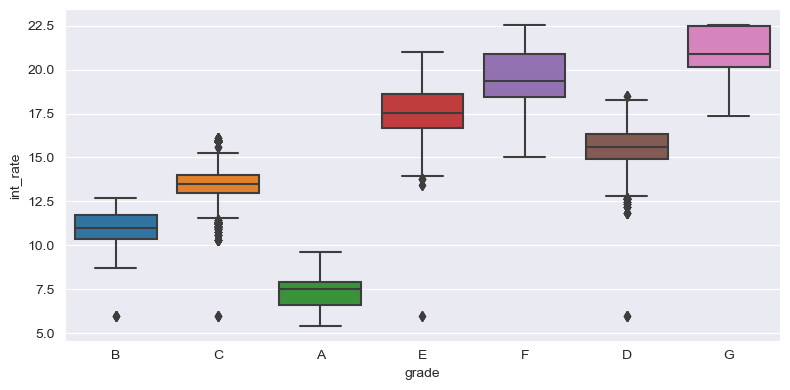

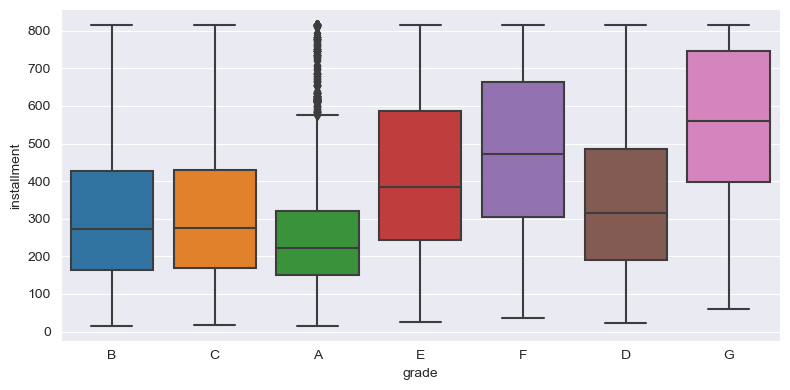

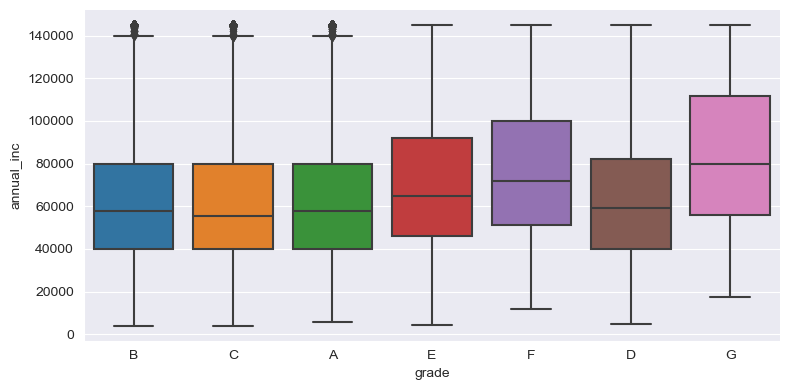

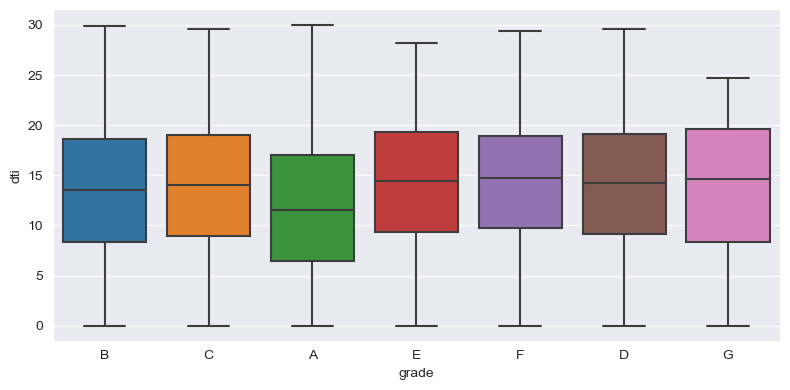

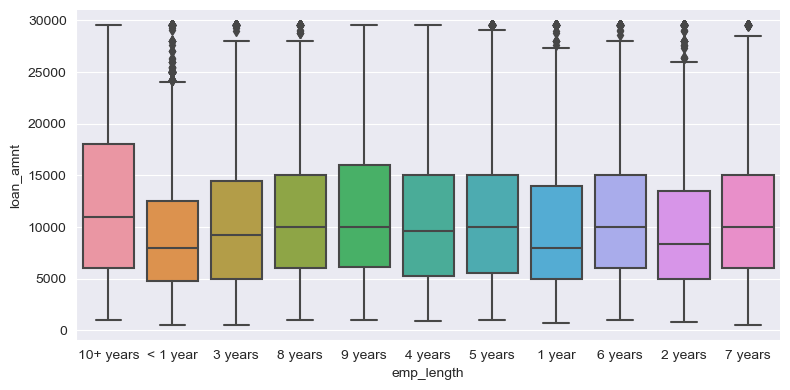

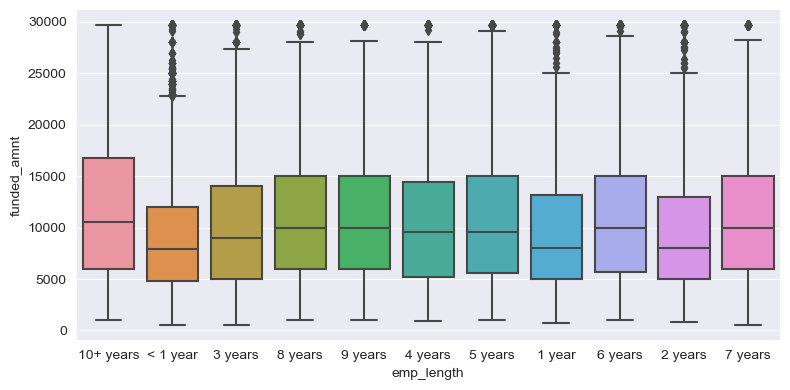

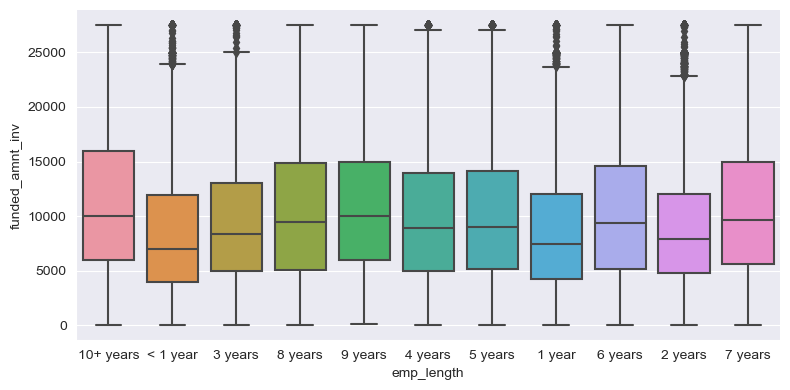

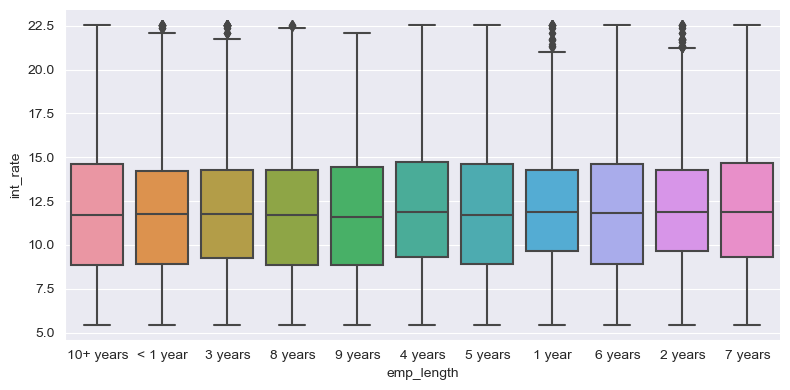

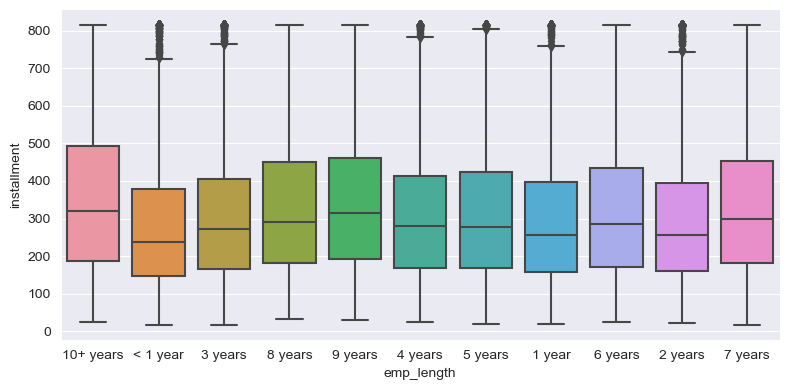

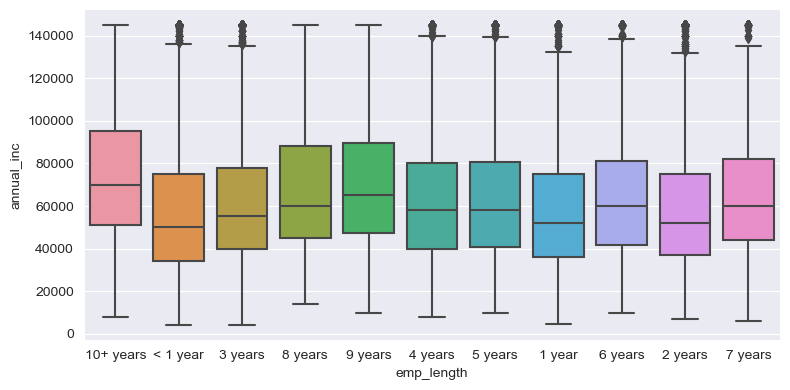

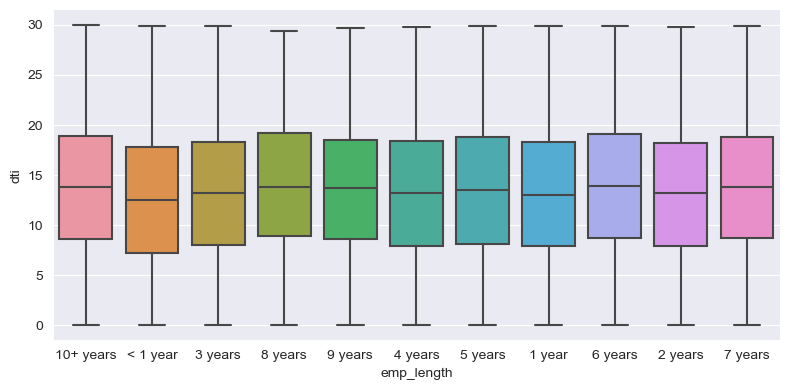

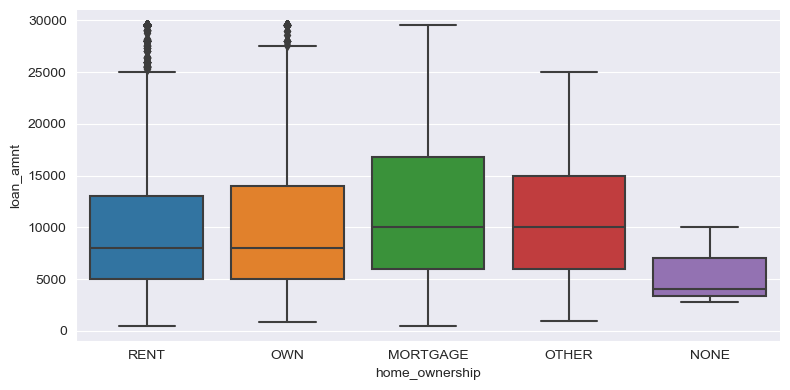

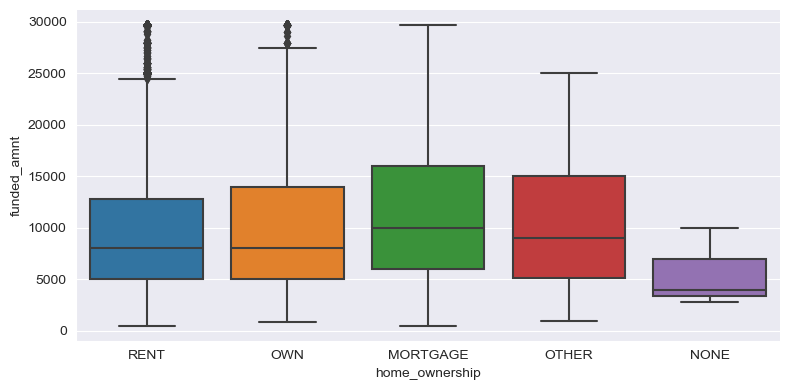

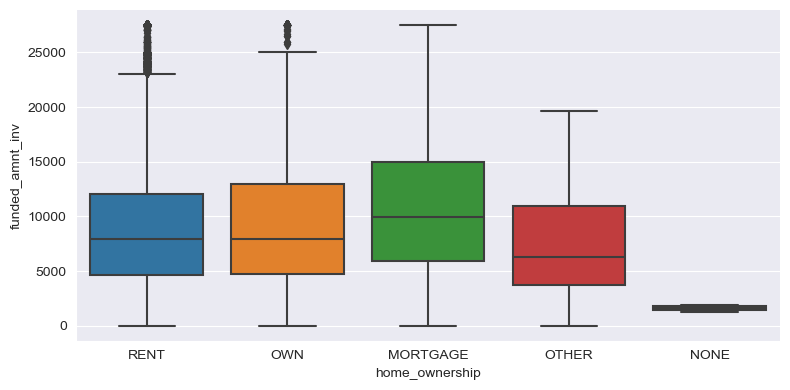

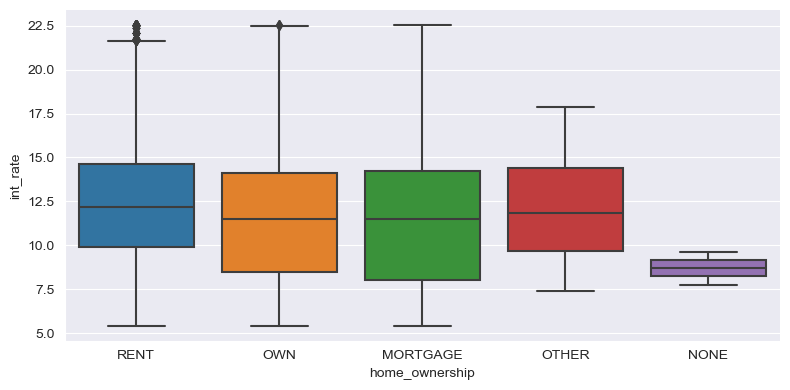

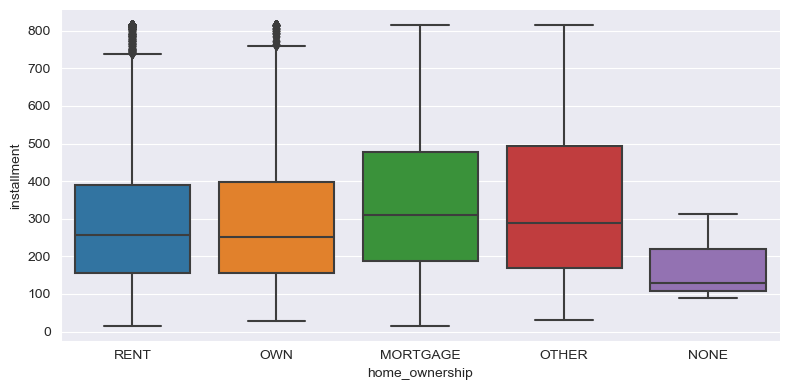

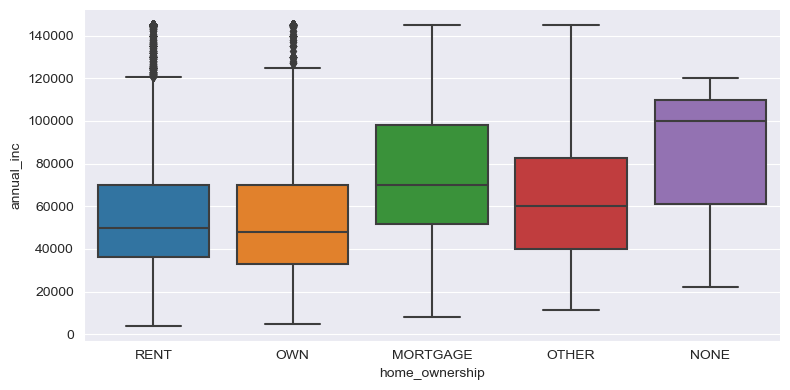

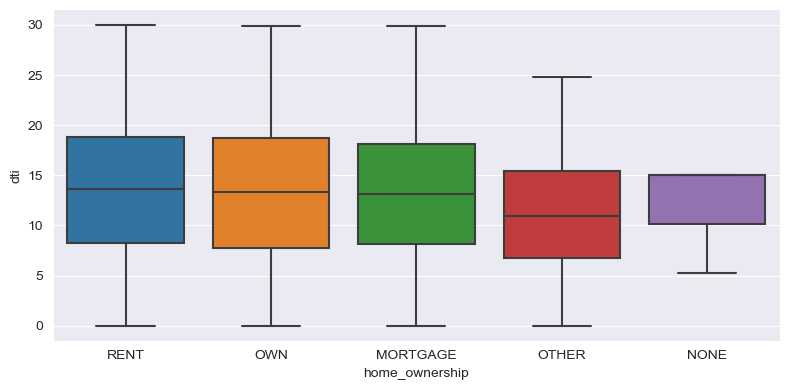

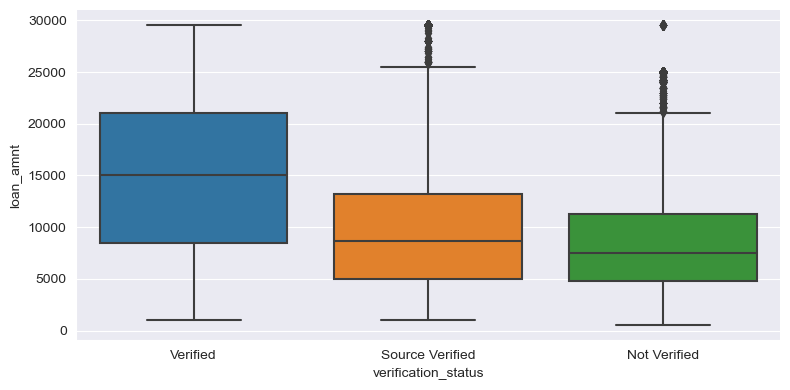

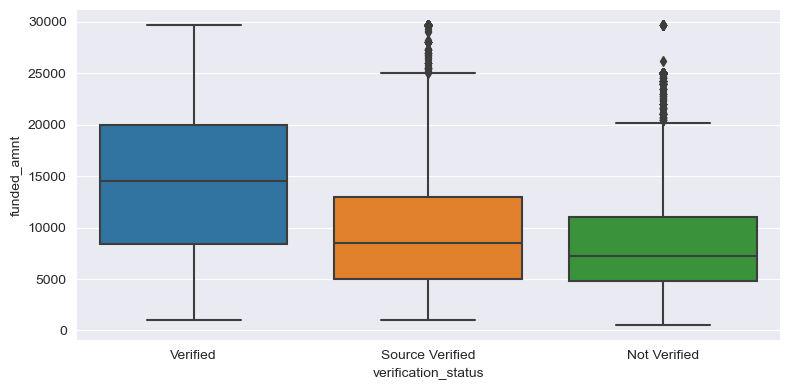

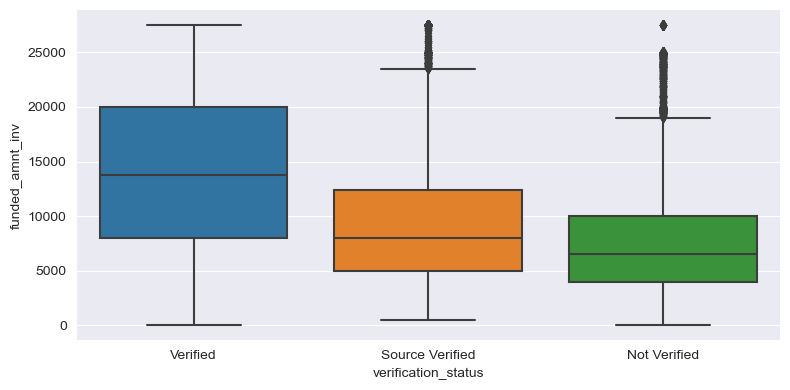

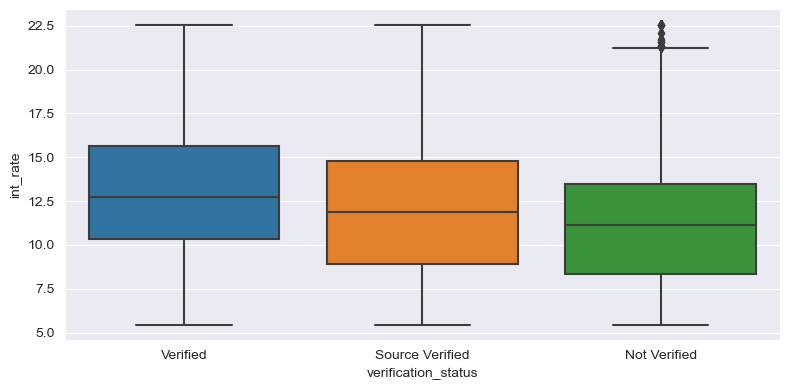

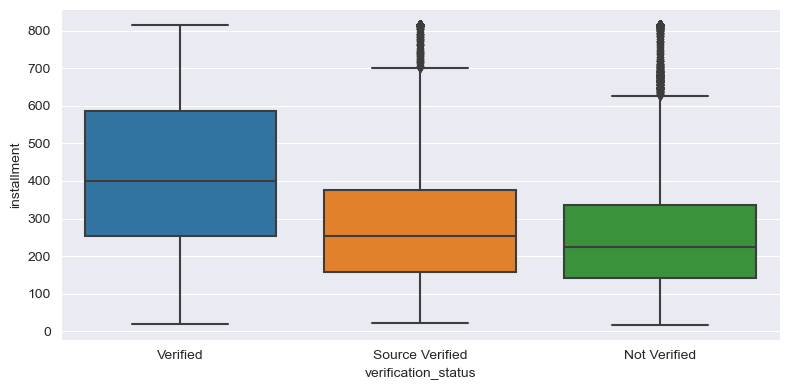

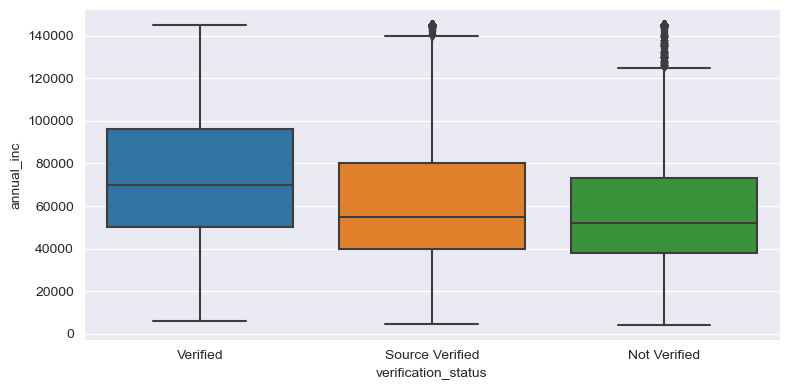

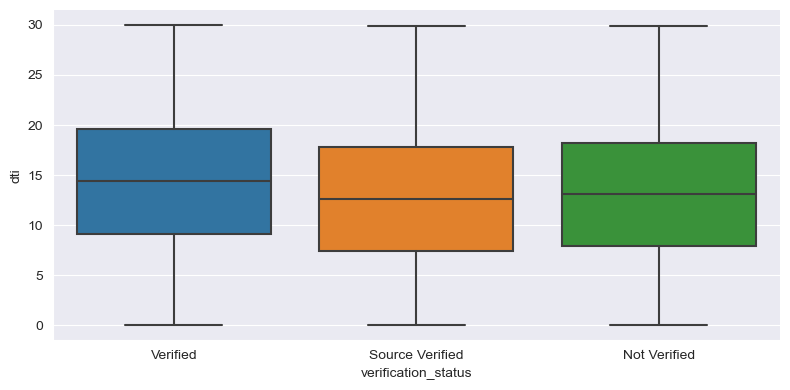

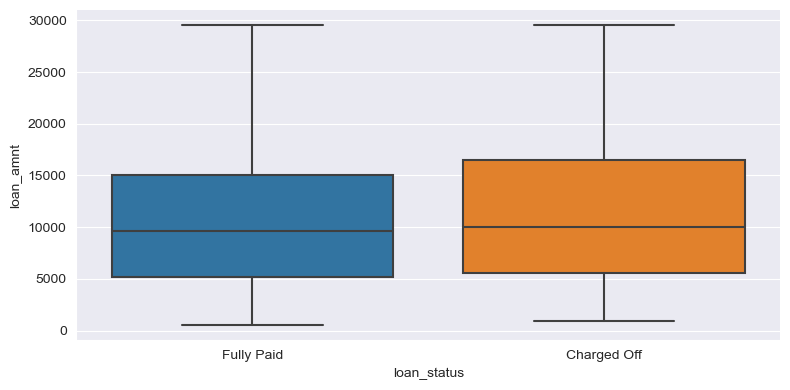

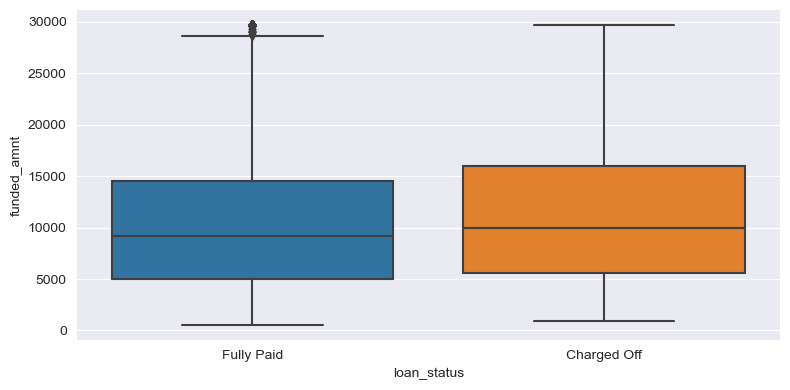

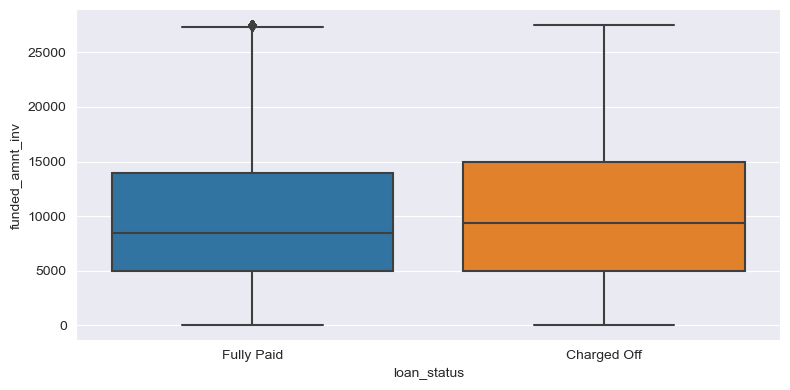

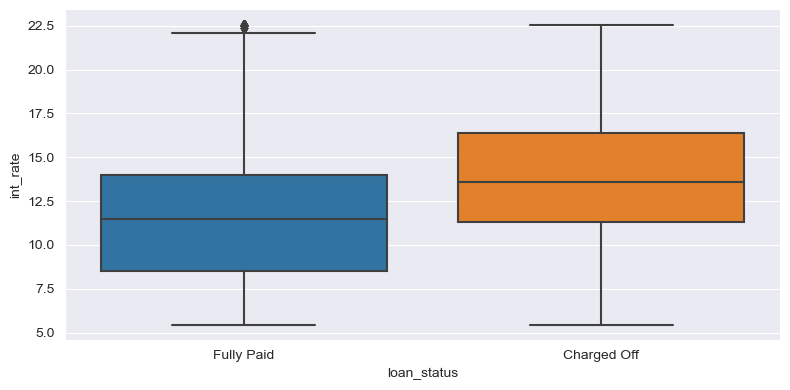

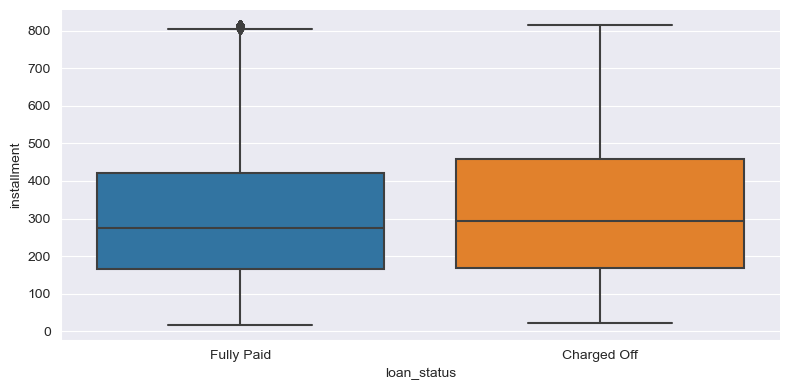

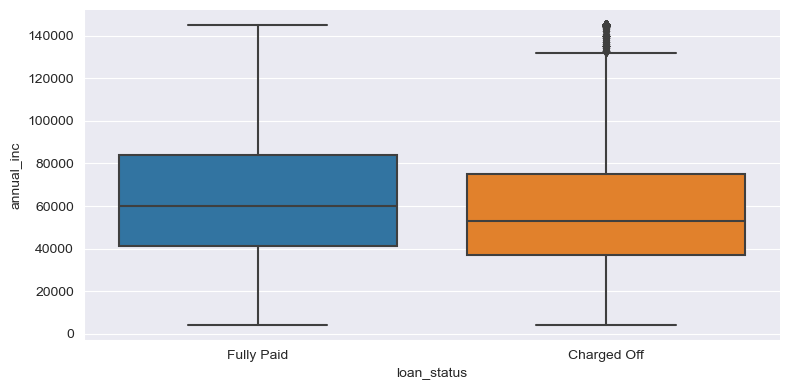

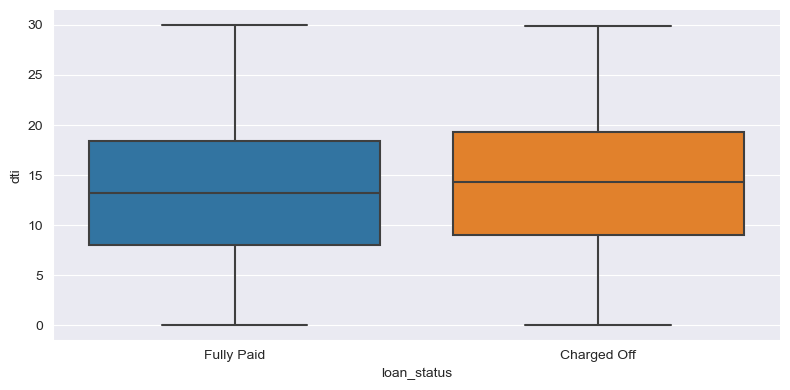

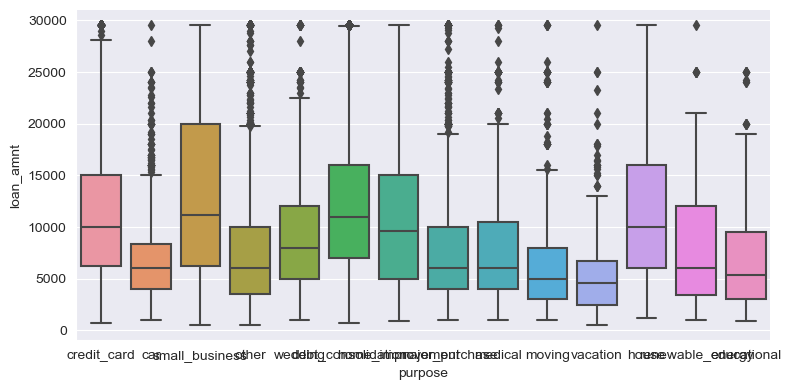

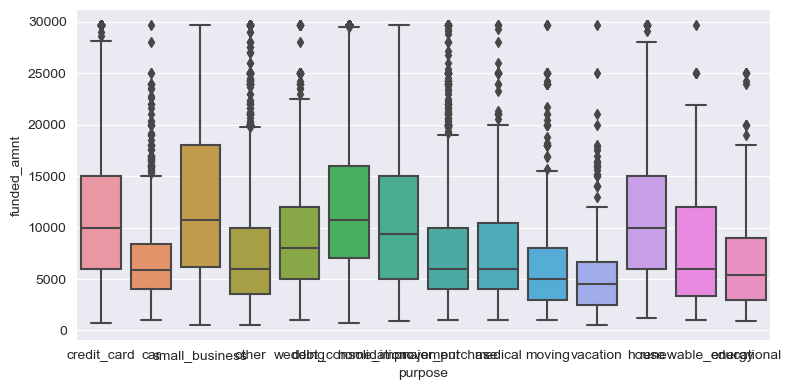

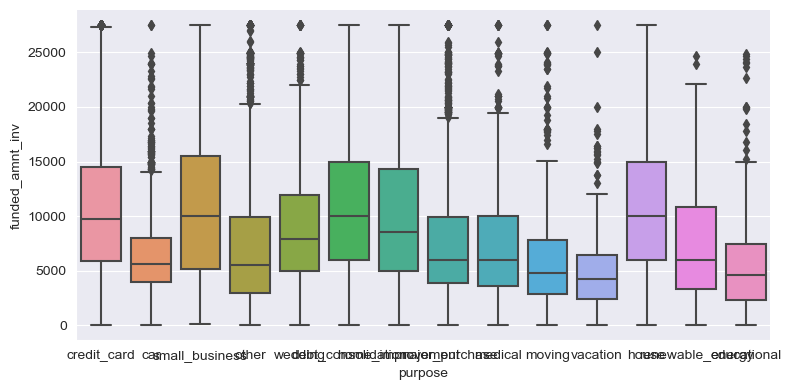

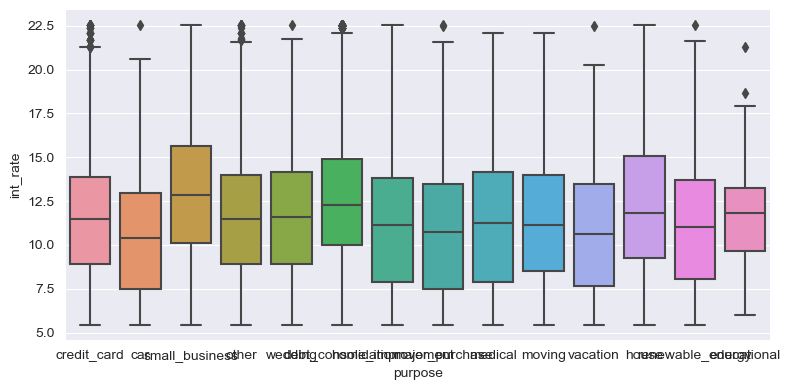

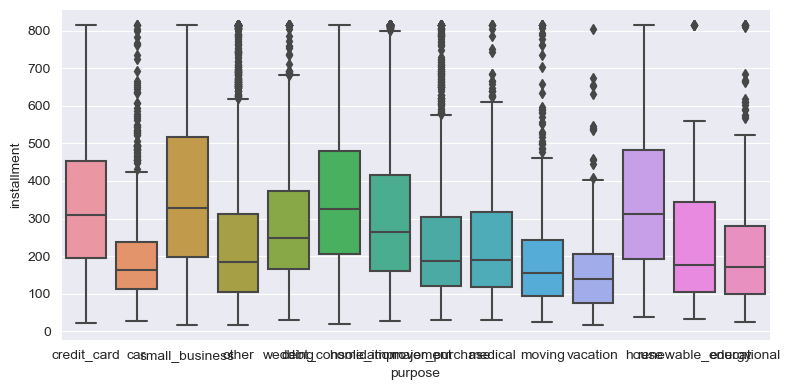

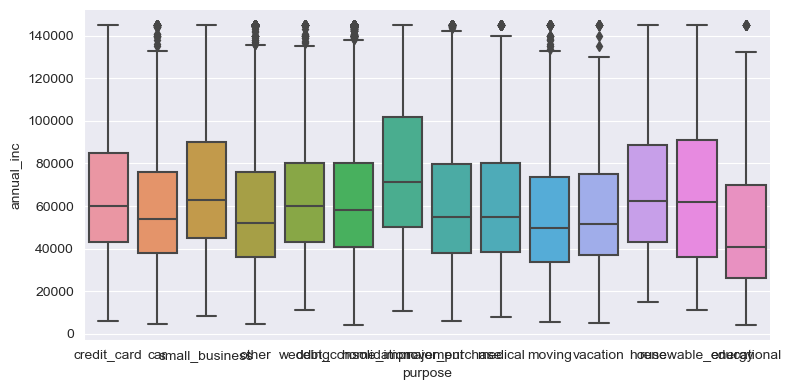

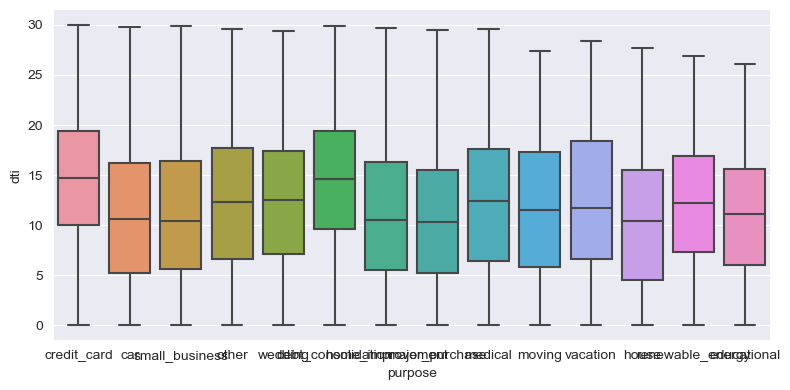

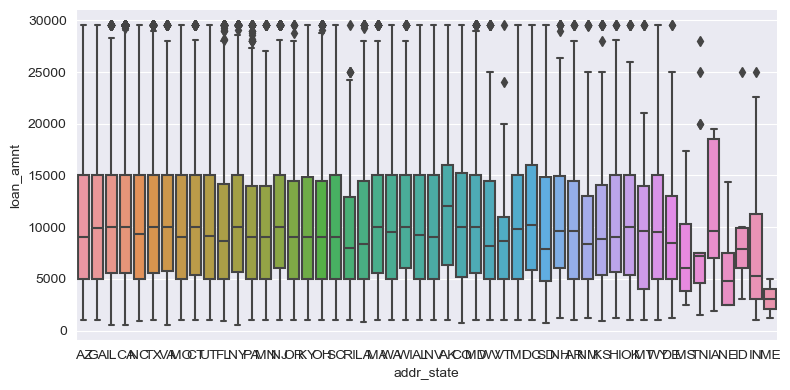

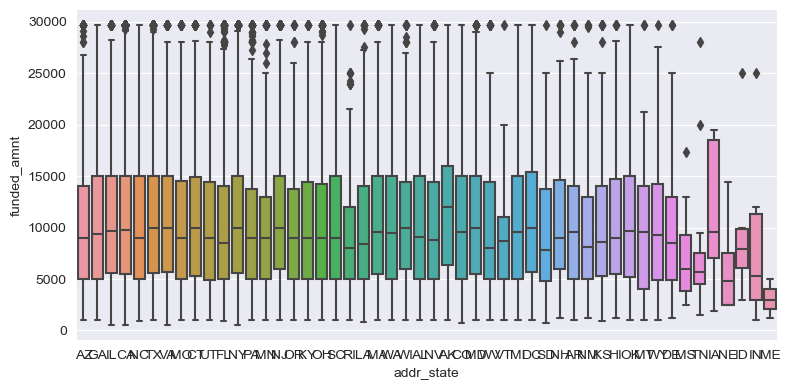

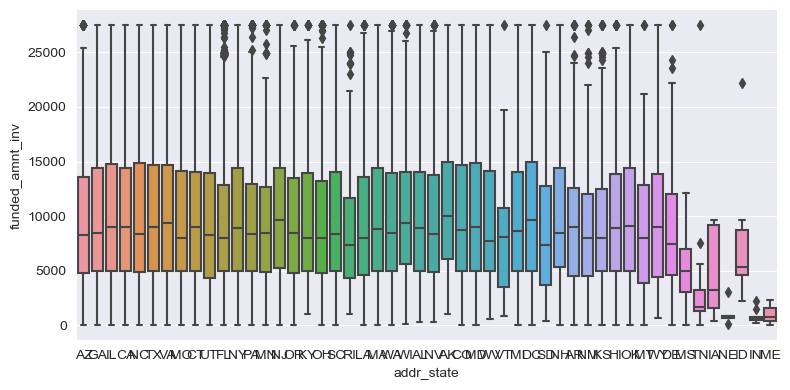

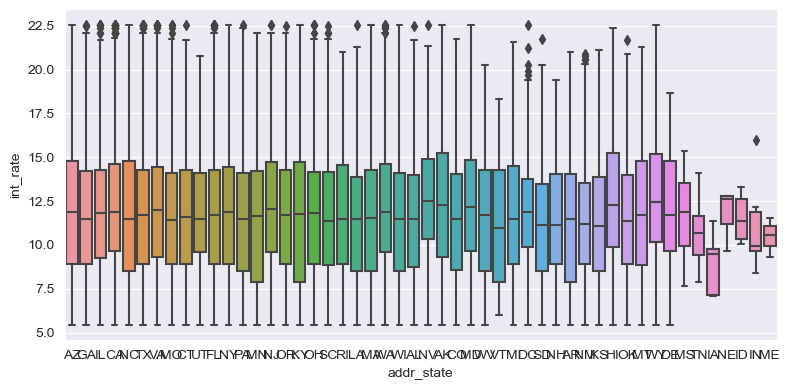

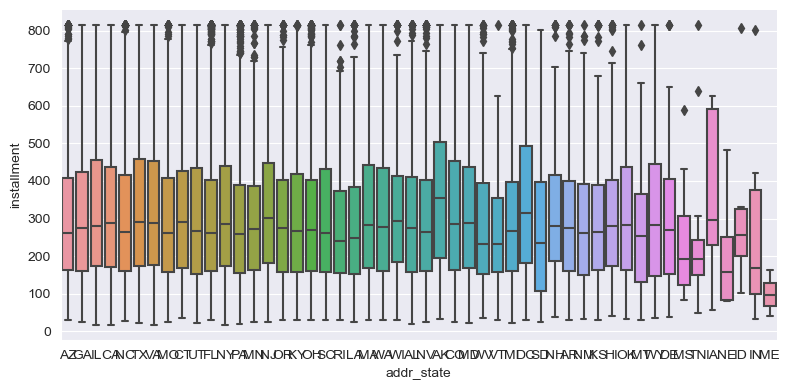

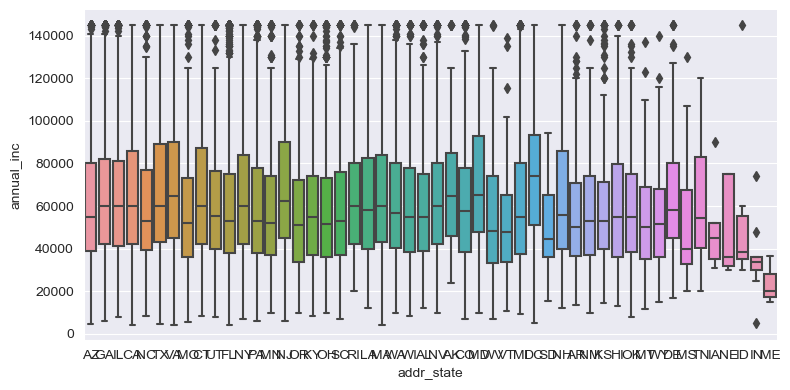

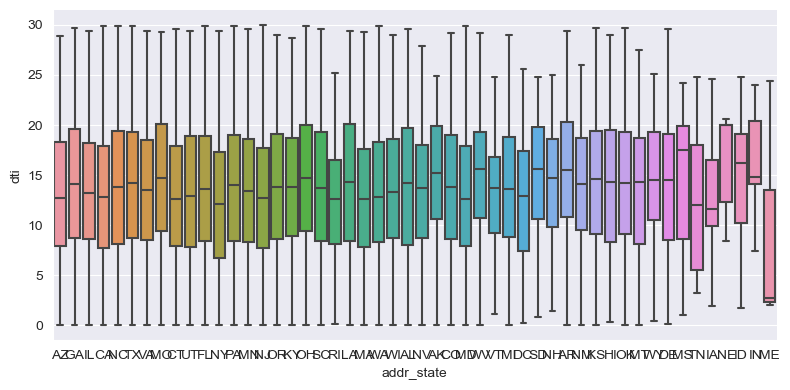

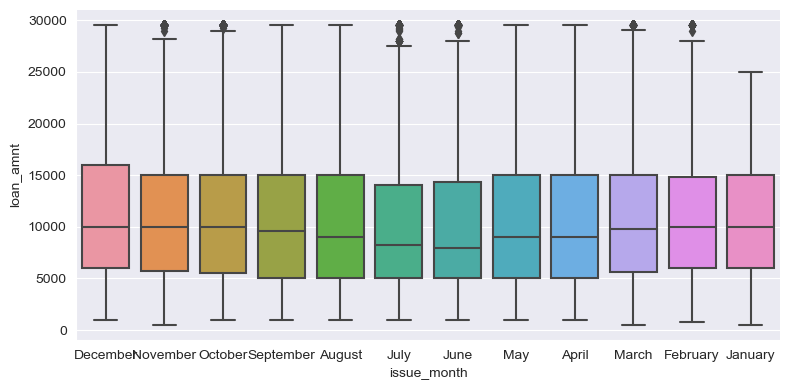

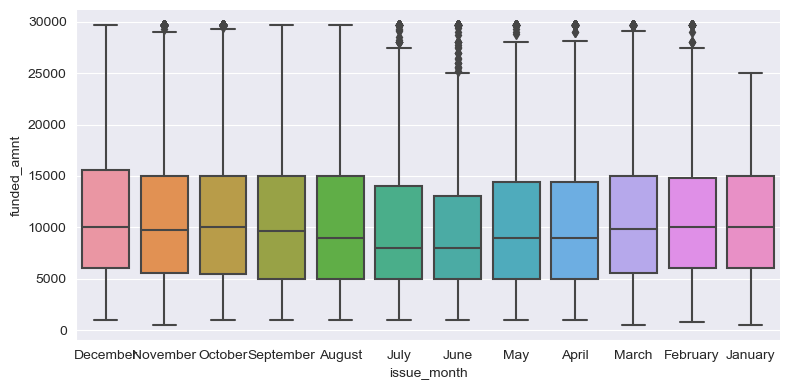

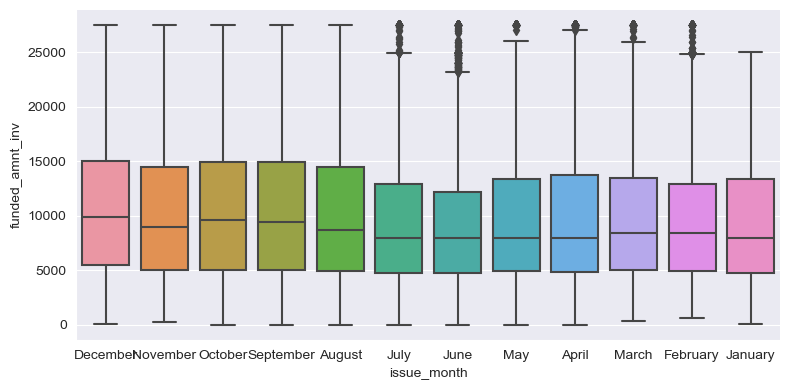

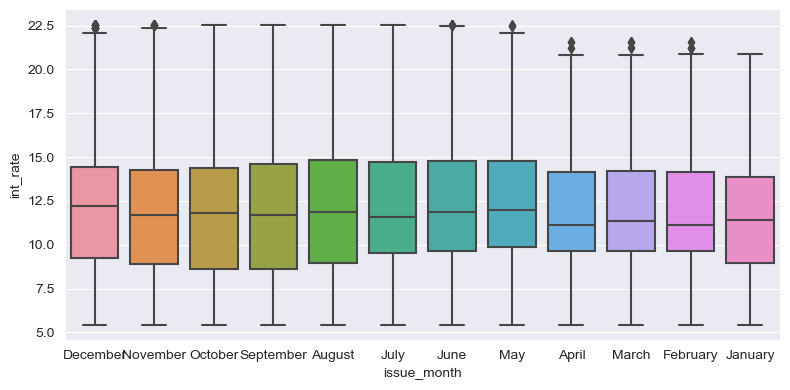

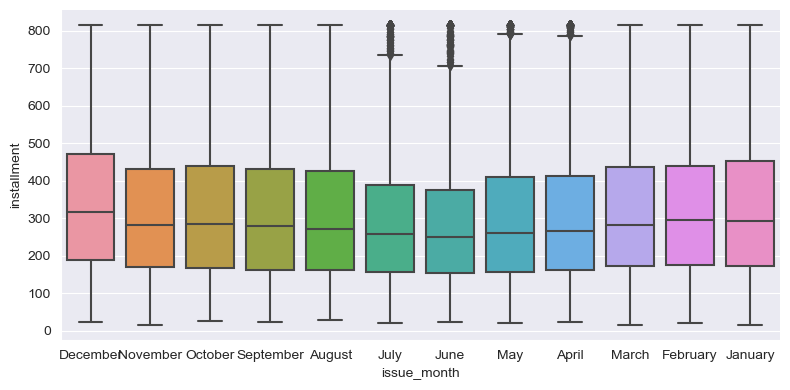

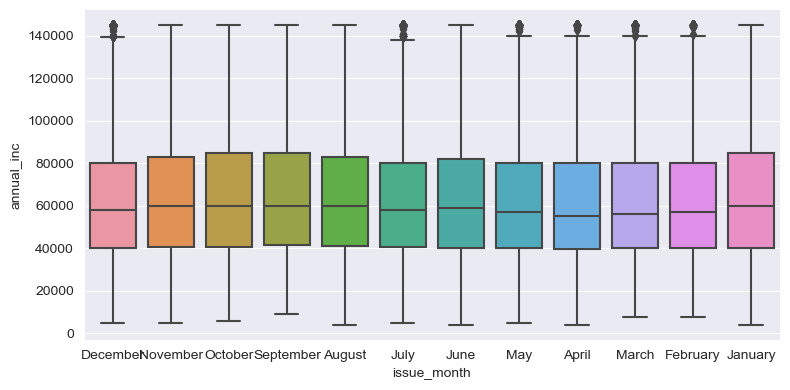

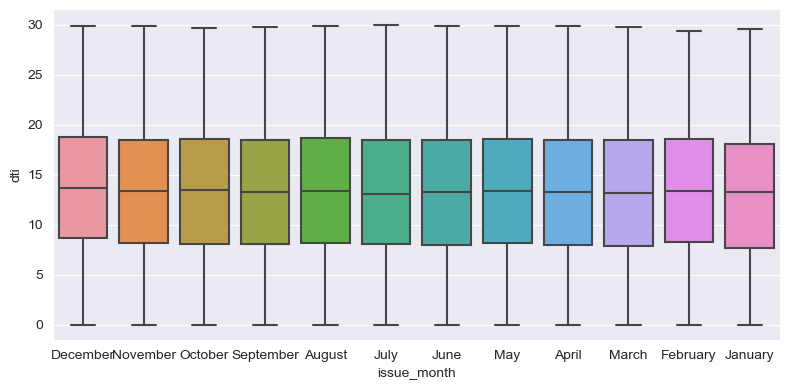

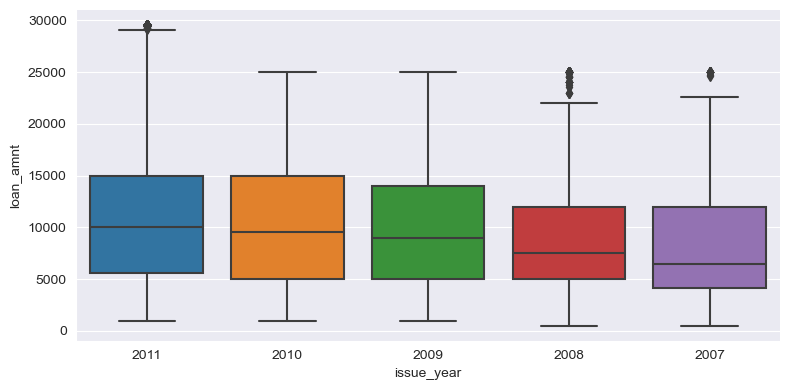

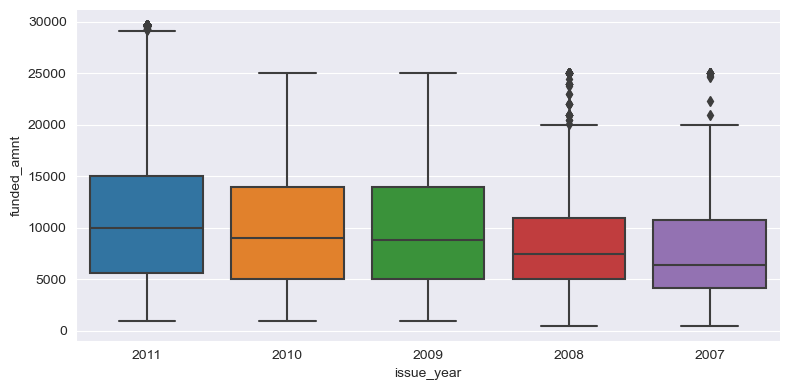

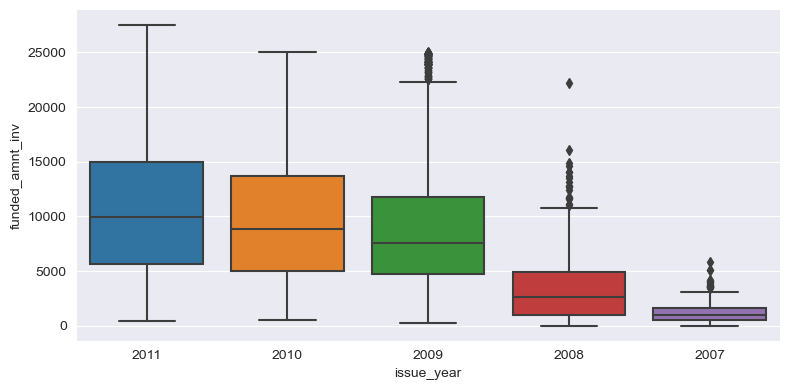

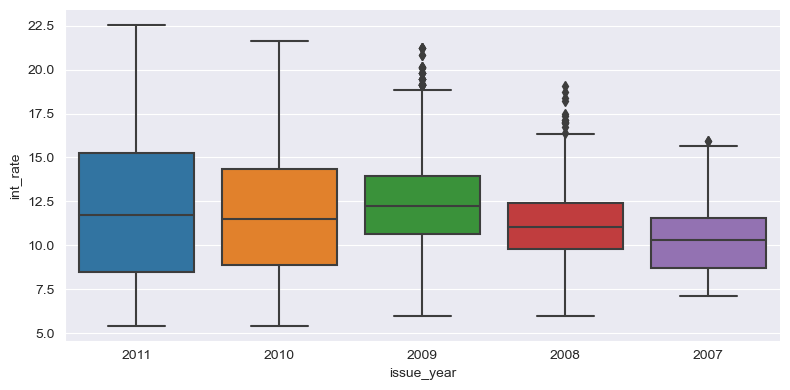

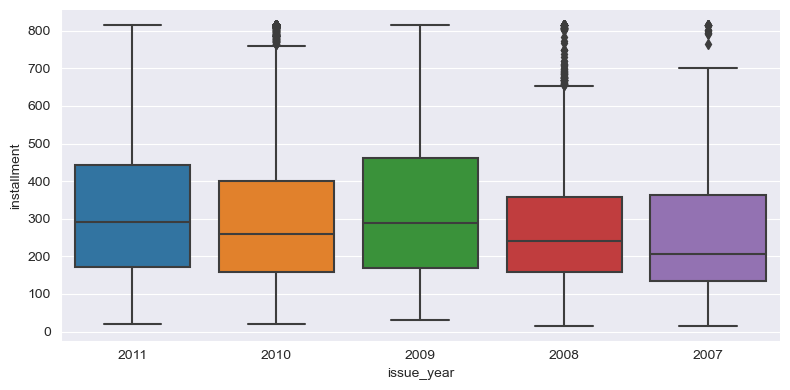

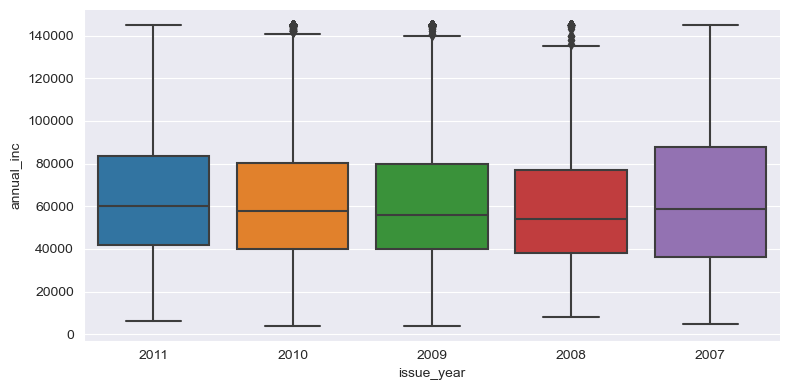

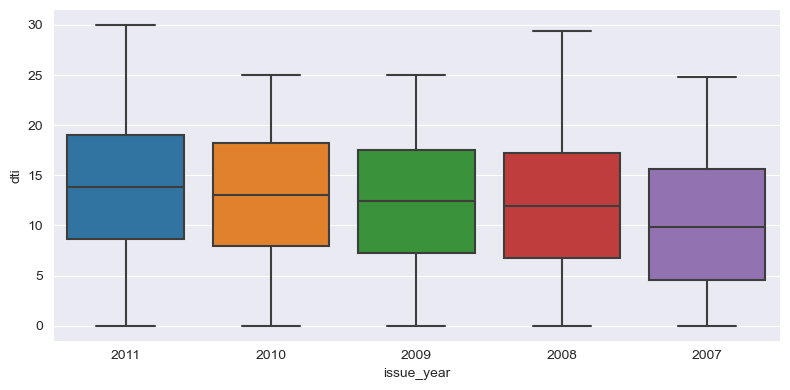

In [130]:
# iterating over all pairs of categorical and numeric variables and visualizing the relationship using a box plot
for i in range(len(categorical_variables)):
    for j in range(len(numeric_variables)):
        x_var = categorical_variables[i]
        y_var = numeric_variables[j]
        sns.catplot(x=x_var, y=y_var, data=loan_df, kind="box", height=4, aspect=2)
        plt.show()

From the box plots, the following inferences are drawn:

The median dti in case of charged-off loan_status is higher than in case of fully paid loan_status <br>
The median annual_inc is greater in case of charged-off loan_status than in case of fully paid loan_status <br>
The median loan_amnt, installment, funded_amnt, and funded_amnt_inv are comparable for both cases of fully paid and charged-off loan_status <br>
The median int_rate is higher in case of charged-off loan_status than in case of fully paid loan_status <br>

The median dti, annual_inc,installment, int_rate, funded_amnt_inv, funded_amnt, and loan_amnt is highest in case of LC-verified profiles compared with source-verified or unverified status.<br>

The median annual_inc varies the most across home_ownership type.<br>
The median annual_inc and funded_amnt_inv vary considerably across the emp_length. <br> 

The int_rate is found to vary drastically across the grade.<br>
The loan_amnt and funded_amnt vary slightly across the grade.<br>

The median loan_amnt, funded_amnt, funded_amnt_inv is substantially less for the term of 36 months than 60 months. 
Nontheless, in case of annual_inc, dti, and installment, this difference is not significant.<br>

The median of loan_amnt, funded_amnt, funded_amnt_inv, and installment vary significantly across different loan purposes.<br>
The median of annual_inc varies significantly across addr_state.<br>
While the median loan_amnt does not vary subtantially across the issue_year, the funded_amnt_inv and int_int show considerable variation.<br>


##### Our target variable for the analysis is loan_status which has two possible values, "Charged Off" and "Fully Paid". Next, we will concentrate our analysis to find out patterns where borrowers default on their loan.

##### Influence of the purpose of loan application on loan default

In [131]:
# Function to calculate percentage of Charged Off loans grouped by the given variable
def loan_default_percetage_group_by(df, groupby_cols):
    no_groupby_cols = len(groupby_cols)
    return df.groupby(by = groupby_cols).size().groupby(level = no_groupby_cols - 1,group_keys = False).apply(lambda x: round(100 * x / float(x.sum()),2))["Charged Off"].sort_values(ascending = False)

In [132]:
#creating a temporary dataframe to store the output after grouping by loan_status and purpose
data = loan_default_percetage_group_by(loan_df, ['loan_status','purpose'])

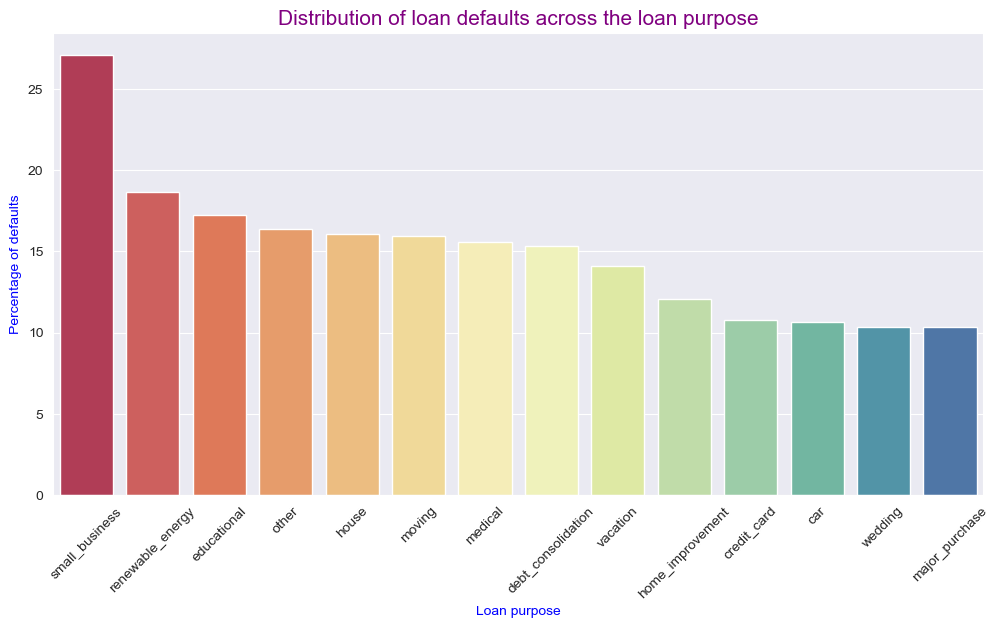

In [135]:
#Visualizing the default percentage versus loan purpose
plt.figure(figsize = (12, 6))
sns.barplot(x = data.keys(), y = data.values, palette="Spectral")
plt.title("Distribution of loan defaults across the loan purpose", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan purpose", color = 'blue')
plt.xticks(rotation=45)
plt.show()

Above bar plot shows that loans taken for the purpose of Small business are extremely risky; ~27% of such loans have defaulted.

##### Influence of loan verification on loan default

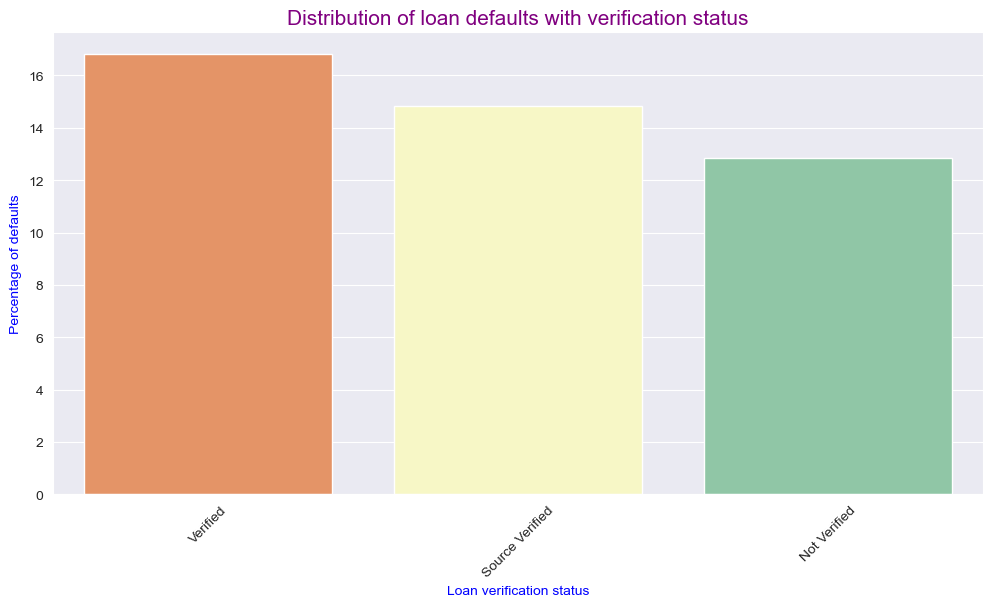

In [139]:
#creating a temporary dataframe to store the output after grouping by loan_status and verification_status
data = loan_default_percetage_group_by(loan_df, ['loan_status','verification_status'])

#visualizing the loan default against verification status
plt.figure(figsize = (12, 6))
sns.barplot(x = data.keys(), y = data.values, palette="Spectral")
plt.title("Distribution of loan defaults with verification status", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan verification status", color = 'blue')
plt.xticks(rotation=45)
plt.show()

This is an interesting observation that verified applicants are defaulting more which suggests that LC's verification process is not effective and maybe there are a few loopholes within the process that need to be addressed.

##### Now, lets find out if this trend is same across all types of loan purpose.

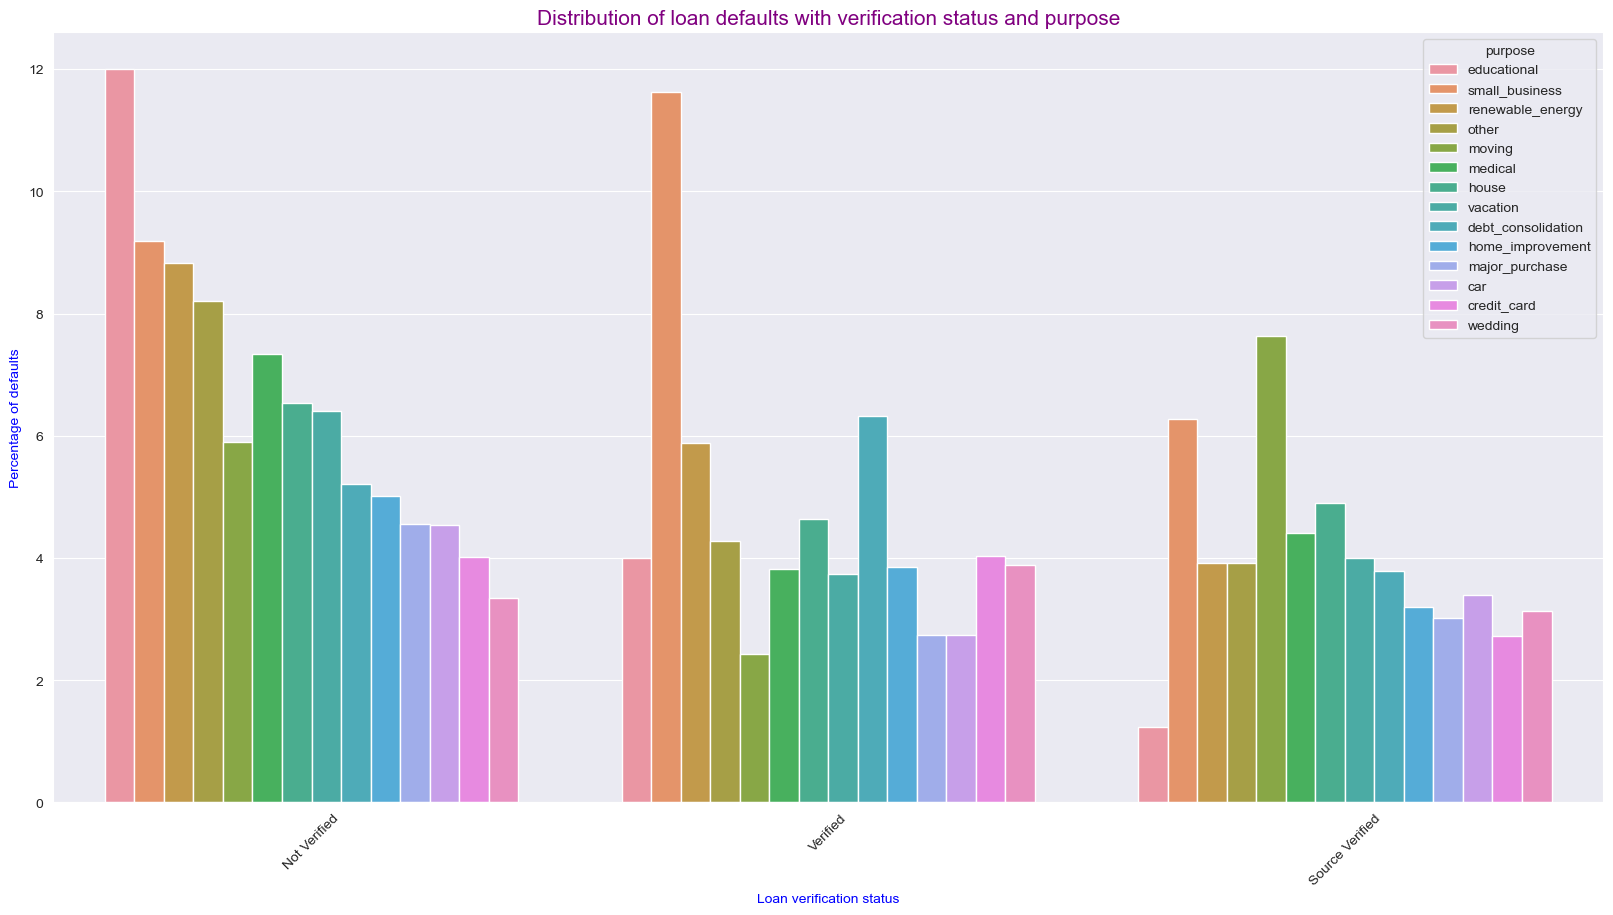

In [141]:
#creating a temporary dataframe to store the output after grouping by loan_status, purpose, and verification_status
data = loan_default_percetage_group_by(loan_df, ["loan_status","verification_status", "purpose"])
data1 = data.to_frame('counts').reset_index()

#visualizing the loan default rate against purpose and verification_status
plt.figure(figsize = (20, 10))
sns.barplot(data = data1, x = "verification_status", y = "counts", hue = "purpose")
plt.title("Distribution of loan defaults with verification status and purpose", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan verification status", color = 'blue')
plt.xticks(rotation=45)
plt.show()

The following are the main observations from this plot: <br>
Loans for educational purpose: These are highly likely to default if loan application profile is not verified. <br>
Loans for Small business: These are most likely to default when income source is verified, compared with when they are not verified or are source-verified. <br>
Loan for moving: These are most likely to default when source-verified. 

##### Analyzing the default percentage across different states

In [144]:
#For effective and concentrated analsyis, states with relatively less number of transactions are not taken into consideration.
considered_states = loan_df.addr_state.value_counts().where(lambda x : x > 100).dropna().keys()

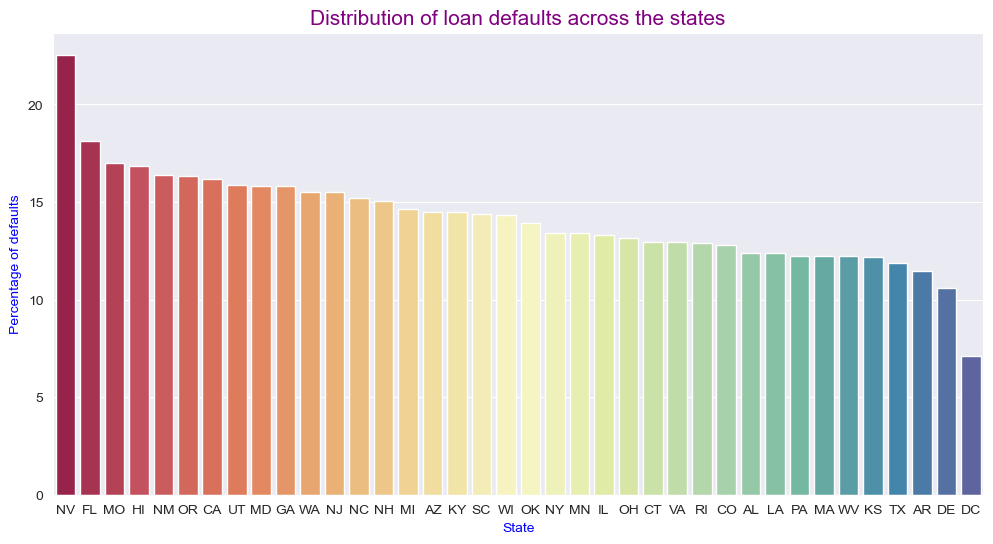

In [146]:
#creating a temporary dataframe to store the output after grouping by loan_status and addr_state
data = loan_default_percetage_group_by(loan_df[loan_df["addr_state"].isin(considered_states)], ['loan_status','addr_state'])

#visualizing the loan default rate across various states
plt.figure(figsize = (12, 6))
sns.barplot(x = data.keys(),
            y = data.values,
            palette="Spectral")
plt.title("Distribution of loan defaults across the states", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("State", color = 'blue')
plt.show()

We observe that NV has the highest default rate of ~27%

##### Influence of loan amount on loan default

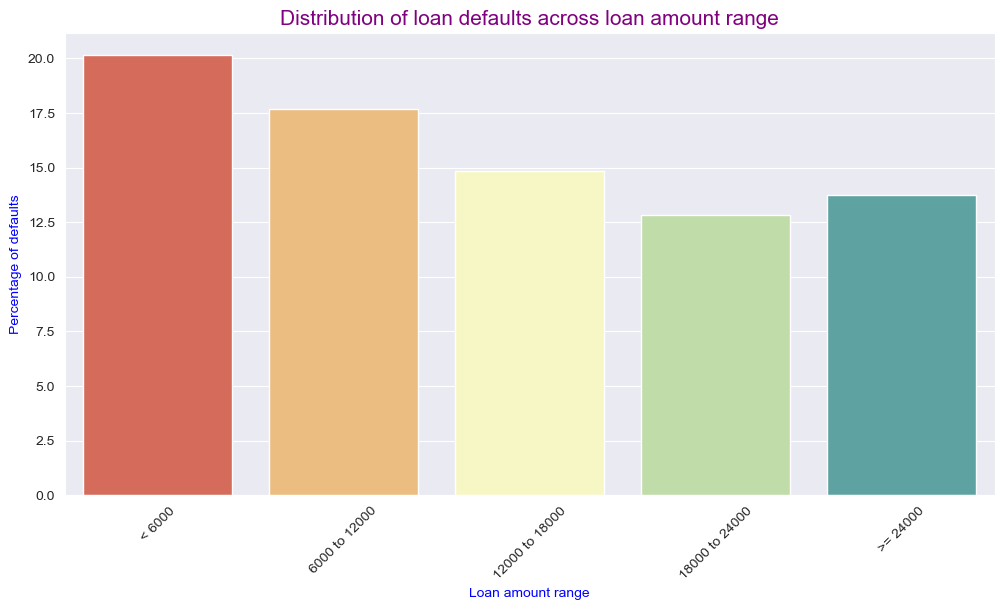

In [159]:
#customized function to create bins
def loan_amnt_range(value):
    if value < 6000:
        return "very low"
    if 6000 <= value < 12000:
        return "low"
    elif 12000 <= value < 18000:
        return "medium"
    elif 18000 <= value < 24000:
        return "high"
    elif value >= 24000:
        return "very high"

#mapping onto the created bins
loan_df_with_amount_range = loan_df
loan_df_with_amount_range['loan_amnt_range'] = loan_df['loan_amnt'].map(loan_amnt_range)

#creating a temporary dataframe to store the output after grouping by loan_status and loan_amnt_range
data = loan_default_percetage_group_by(loan_df_with_amount_range, ['loan_status','loan_amnt_range'])


#visualizing the loan default rate across the loan amount range
plt.figure(figsize = (12, 6))
g = sns.barplot(x = data.keys(),
            y = data.values,
            order = ["very high", "high", "medium", "low", "very low"],palette="Spectral")
plt.title("Distribution of loan defaults across loan amount range", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan amount range", color = 'blue')
plt.xticks(rotation = 45)
g.set_xticklabels(["< 6000", "6000 to 12000", "12000 to 18000", "18000 to 24000", ">= 24000"])
plt.show()

We observe that the higher-amount loans are more likely to default.

##### Now let's visulalize this trend against verification_status

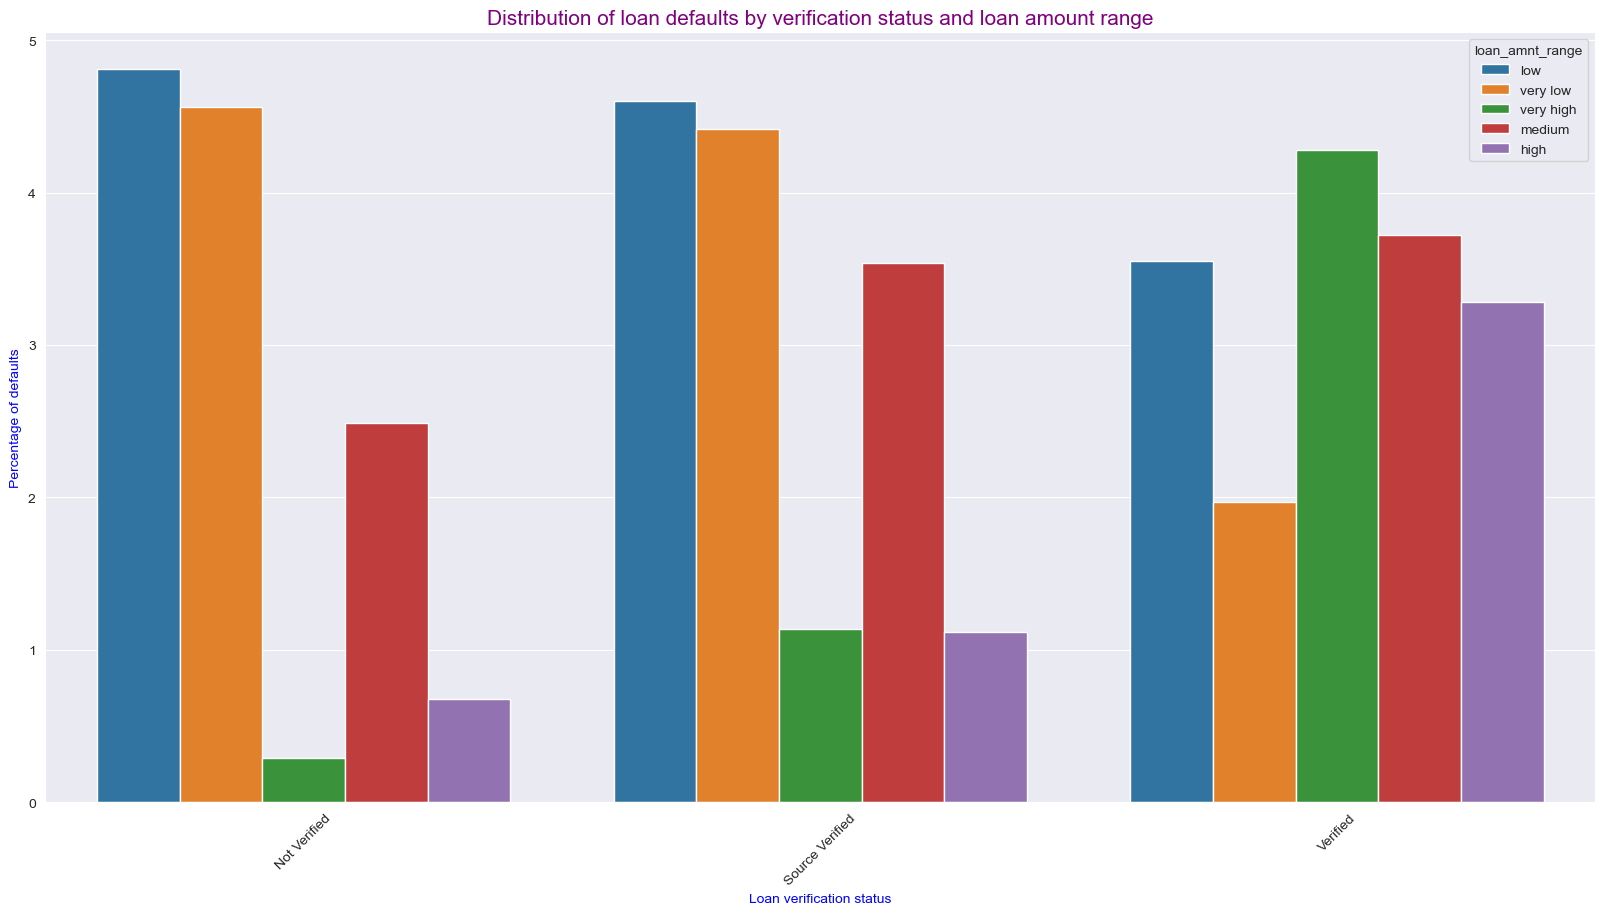

In [149]:
#creating a temporary dataframe to store the output after grouping by loan_status, loan_amnt_range, and verification_status 
data = loan_default_percetage_group_by(loan_df, ['loan_status', 'loan_amnt_range', 'verification_status'])

#visualizing the loan default rate across the loan amount range and verification status
data1 = data.to_frame('counts').reset_index()
plt.figure(figsize = (20, 10))
sns.barplot(data = data1, x = "verification_status", y = "counts", hue = "loan_amnt_range")
plt.title("Distribution of loan defaults by verification status and loan amount range", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan verification status", color = 'blue')
plt.xticks(rotation=45)
plt.show()

The verification process is apparently effective for loans with low and very low amount but not as effective for higher-amount loans. This necessitates revisiting the verification process at a policy level and making the necessary changes to the existing process, such that the loan applicant profiles for a wide-ranging loan amount are thoroughly verified.

##### Influence of loan term on loan default 

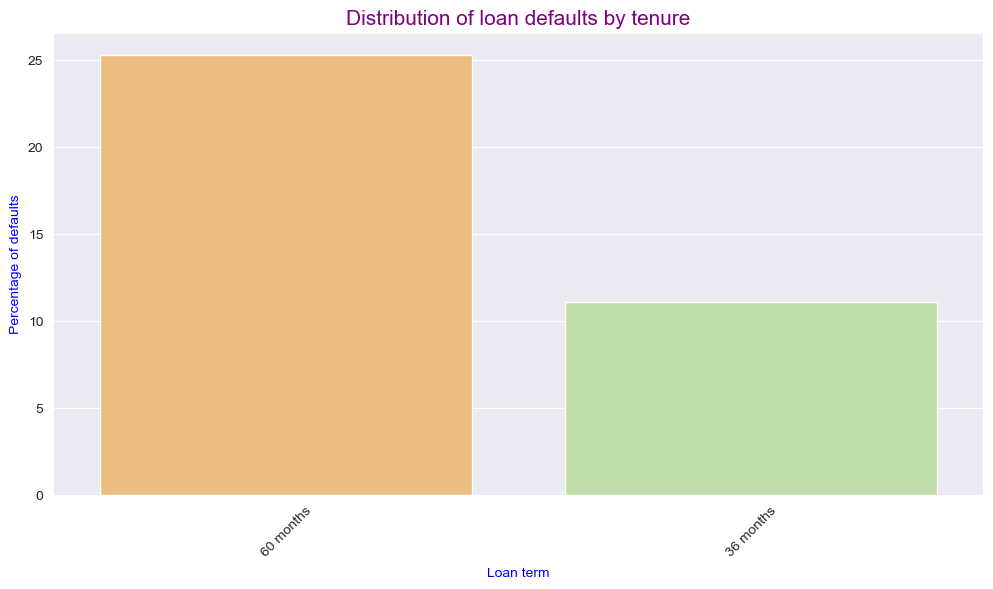

In [151]:
#creating a temporary dataframe to store the output after grouping by loan_status and term 
data = loan_default_percetage_group_by(loan_df, ['loan_status','term'])

#visualizing the loan default rate across the loan tenure
plt.figure(figsize = (12, 6))
sns.barplot(x = data.keys(),
            y = data.values,
            palette="Spectral")
plt.title("Distribution of loan defaults by tenure", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan term", color = 'blue')
plt.xticks(rotation=45)
plt.show()

As observed here, loans with long tenure are more likely to default. The default rate is double over the 60-months tenure compared with that over the 36-months tenure.

##### Influence of loan grade on the default rate

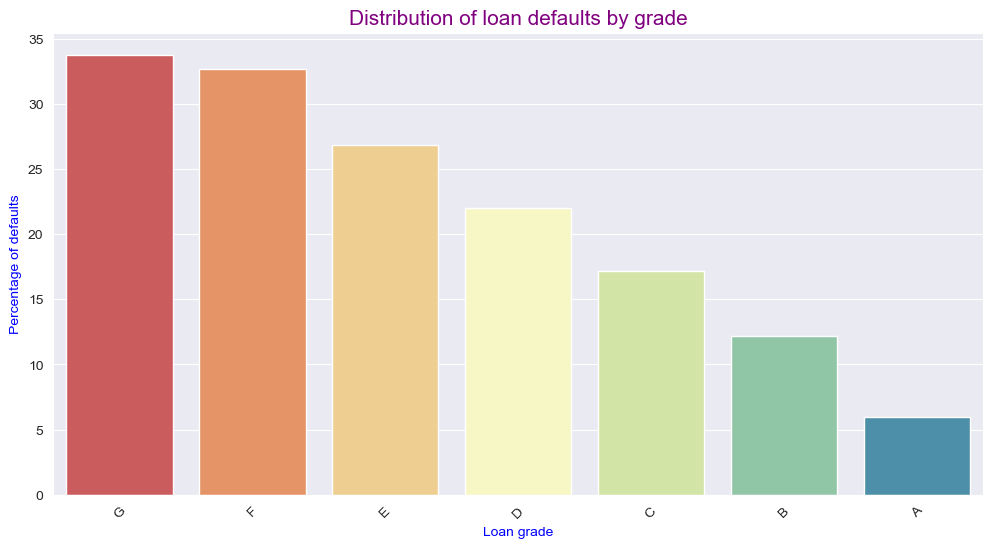

In [153]:
#creating a temporary dataframe to store the output after grouping by loan_status and grade 
data = loan_default_percetage_group_by(loan_df, ['loan_status','grade'])

#visualizing the loan default rate across the loan grade
plt.figure(figsize = (12, 6))
sns.barplot(x = data.keys(),
            y = data.values,
            palette="Spectral")
plt.title("Distribution of loan defaults by grade", fontsize = 15, color = 'purple')
plt.ylabel("Percentage of defaults", color = 'blue')
plt.xlabel("Loan grade", color = 'blue')
plt.xticks(rotation=45)
plt.show()

The default percent is observed to increase with the progression from grade A to G.
The current dataset does not specify the parameters underlying this grade allocation. Perhaps, insight into those underlying parameters will be more revealing pertaining to this trend noted here.

##### Overall, based on all the preceding analyses and inferences, we summarize this study as follows:

##### •	The median loan amount, installment, funded amount, and the total amount committed by investors for that loan at that point in time are comparable for both cases of fully paid and charged-off (defaulted) loan status.
##### •	The median loan amount, funded amount, the total amount committed by investors for that loan at that point in time, and the installment vary substantially across the purpose underlying the loan.
##### •	The loans drawn for the purpose of small business are extremely risky, and ~27% of such loans have defaulted.
##### •	Loans for educational purpose are highly likely to default if loan application profile is not verified.
##### •	The state NV has the highest default rate of ~27%.
##### •	The higher-amount loans are more likely to default.
##### •	The verification process is apparently effective for loans with low and very low amount but not as effective for higher-amount loans.
##### •	Loans with long tenure are more likely to default.
##### •	The default percent is observed to increase with the progression from grade A to G.


##### In particular, it is counter-intuitive that (1) the median annual income is greater in case of defaulted loan status than in case of fully paid loan status, (2) that the number of defaulters is maximum in case of applicants with 10 or more years of experience, and (3) that the default rate is the highest in case of verified profiles.


##### Overall, based on these observations, we make the following recommendations:
##### (1) The verification process needs to be revisited at a policy level. Based on the data, verification seems to be apparently effective for loans with low and very low amount but not as effective for higher-amount loans. Necessary changes are required in the existing verification process, such that the loan applicant profiles encompassing diverse ranges of loan amounts are thoroughly verified.

##### (2) Since the default default percent is observed to increase with the progression from grade A to G, a closer look into the  parameters underlying this grade allocation could give us more insight pertaining to this trend noted here. The parameters considered during gradation are not provided in the original data file; thus, we could not proceed with further analysis of such parameters. We recommend invetigation of those parameters underlying gradation.

##### (3) Since loans characterized by longer terms and higher amounts have shown higher default rates, we recommend deciding on a upper limit on the amount of loan that an applicant can apply for and is sanctioned. Furthermore, shorter terms are recommended.

##### (4) We recommend treating the loans filed for from NV with additional verification and caution. 

##### (5) The loans applied for the purpose of business should also be treated with additional verification and caution. For these types of loans, specifically focusing on income verification of the application is recommended, as it has been observed that such loans are less likely to default upon income verification.

##### (6) The loans applied for the purpose of education should be thoroughly verified.

##### Although by leveraging EDA we have arrived at this stage with the aforementioned inferences and recommendations, to further determine the order of significance and effectiveness of these parameters in predicting loan default, a statistical analysis such as logistic regression or decision tree analysis can be performed. These methods can help identify the most significant predictors of default by assessing the strength of the relationship between each predictor and the outcome variable (default or non-default). After performing the statistical analysis, the parameters can be ranked in order of significance in predicting loan default. This ranking can then be used to develop a predictive model for identifying risky borrowers and mitigating default risk.